In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sn
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm






In [170]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# ny

In [ ]:
import pandas as pd
import requests
import json

def find(latitude, longitude):
    
    radius_sub = 500
    radius_res = 500
    radius_bus = 500

    
    overpass_url = "http://overpass-api.de/api/interpreter"
    overpass_query = f"""
    [out:json];
    (
      node["railway"="subway_entrance"](around:{radius_sub}, {latitude}, {longitude});
      node["highway"="bus_stop"](around:{radius_bus}, {latitude}, {longitude});
      node["amenity"="restaurant"](around:{radius_res}, {latitude}, {longitude});
    );
    out body;
    """
    
    try:
        
        response = requests.get(overpass_url, params={'data': overpass_query})
        response.raise_for_status()  
        
        
        data = response.json()
        count_sub, count_res, count_bus = 0, 0, 0
        
        
        for element in data.get('elements', []):
            if element['type'] == 'node':
                tags = element.get('tags', {})
                if tags.get('railway') == 'subway_entrance':
                    count_sub += 1
                elif tags.get('amenity') == 'restaurant':
                    count_res += 1
                elif tags.get('highway') == 'bus_stop':
                    count_bus += 1                    
                    
        return count_sub, count_res,count_bus

    except (requests.RequestException, json.JSONDecodeError) as e:
        print(f"获取坐标 ({latitude}, {longitude}) 的数据时出错：{e}")
        return 0, 0


df = pd.read_csv('Mexico_listings 1.csv')
df = df[df['neighbourhood_cleansed'] == 'Miguel Hidalgo']
df = df[['id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'price']]
df.dropna(inplace=True)
df = df[df['price'] != 0]
df = df[df.index % 8 == 0]
df[['subway_n', 'res_n','bus_n']] = df.apply(lambda row: pd.Series(find(row['latitude'], row['longitude'])), axis=1)
df.to_csv('m20.csv', index=False)


In [494]:
df_ny = pd.read_csv('ny4.csv')
df_ny['price'] = df_ny['price'].str.replace(',', '')
df_ny['price'] = df_ny['price'].str.replace('$', '').astype(float)
Q1 = df_ny['price'].quantile(0.25)
Q3 = df_ny['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_ny = df_ny[(df_ny['price'] >= lower_bound) & (df_ny['price'] <= upper_bound)]
print(df_ny.head(20))

                     id neighbourhood_cleansed   latitude  longitude  price  \
0   1020282701018874374     Bedford-Stuyvesant  40.678946 -73.943759   47.0   
1              13234457     Bedford-Stuyvesant  40.682750 -73.958140   60.0   
2    773237631431486588     Bedford-Stuyvesant  40.678090 -73.939710  150.0   
3   1168091987963126455     Bedford-Stuyvesant  40.682643 -73.942914  149.0   
4    796986371882195221     Bedford-Stuyvesant  40.678946 -73.943759   48.0   
5    640443472855597440     Bedford-Stuyvesant  40.687400 -73.954970  194.0   
7    969035784970111373     Bedford-Stuyvesant  40.683602 -73.930338  225.0   
8   1202348834470237181     Bedford-Stuyvesant  40.684842 -73.942289  230.0   
9    820166028658823579     Bedford-Stuyvesant  40.689090 -73.936110   90.0   
10  1151565053985705122     Bedford-Stuyvesant  40.689682 -73.944083  250.0   
11             53666929     Bedford-Stuyvesant  40.688530 -73.937000  190.0   
12  1066102862445188127     Bedford-Stuyvesant  40.6

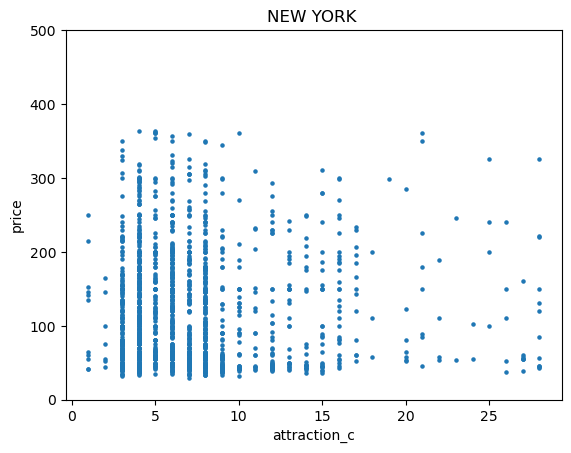

1.9569876121884304 0.0251744624083246


In [496]:
plt.scatter(df_ny['attraction_c'], df_ny['price'],s = 5)

plt.title('NEW YORK ')
plt.xlabel('attraction_c')
plt.ylabel('price')
plt.ylim(0, 500)

plt.show()
g_0 = df_ny[df_ny['attraction_c'] < 4 ]['price']
g_1 = df_ny[df_ny['attraction_c'] > 4]['price']
z, p = ztest(g_1, g_0)
print(z,p/2)

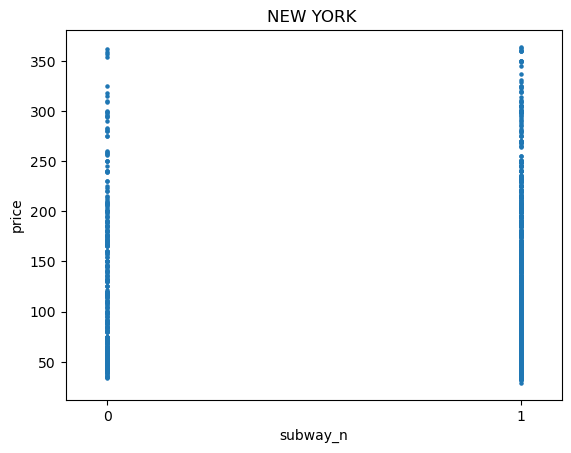

In [498]:
df_ny['subway_n'] = df_ny['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_ny['subway_n'], df_ny['price'],s = 5)

plt.title('NEW YORK ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()


In [290]:
'''df_ny = pd.read_csv('ny2.csv')
df_ny['price'] = df_ny['price'].str.replace(',', '')
df_ny['price'] = df_ny['price'].str.replace('$', '').astype(float)
df_ny['subway_n'] = df_ny['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_ny['subway_n'], df_ny['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('subway_n2')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)
plt.ylim(0, 500)

plt.show()'''

"df_ny = pd.read_csv('ny2.csv')\ndf_ny['price'] = df_ny['price'].str.replace(',', '')\ndf_ny['price'] = df_ny['price'].str.replace('$', '').astype(float)\ndf_ny['subway_n'] = df_ny['subway_n'].apply(lambda x: 1 if x >= 1 else x)\nplt.scatter(df_ny['subway_n'], df_ny['price'],s = 5)\n\nplt.title('Scatter Plot ')\nplt.xlabel('subway_n2')\nplt.ylabel('price')\nplt.xticks([0, 1])\nplt.xlim(-0.1, 1.1)\nplt.ylim(0, 500)\n\nplt.show()"

In [500]:
g_0 = df_ny[df_ny['subway_n'] == 0]['price']
g_1 = df_ny[df_ny['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p/2)

1.0633209370843142 0.14381821675074263


In [31]:
g_0.mean(),g_1.mean()

(116.81190476190476, 121.37180544105523)

In [144]:
g_0.mean(),g_1.mean()

(276.73333333333335, 210.7277777777778)

In [292]:

'''g_0 = df_ny[df_ny['subway_n'] == 0]['price']
g_1 = df_ny[df_ny['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

"g_0 = df_ny[df_ny['subway_n'] == 0]['price']\ng_1 = df_ny[df_ny['subway_n'] == 1]['price']\nz, p = ztest(g_1, g_0)\nprint(z,p)"

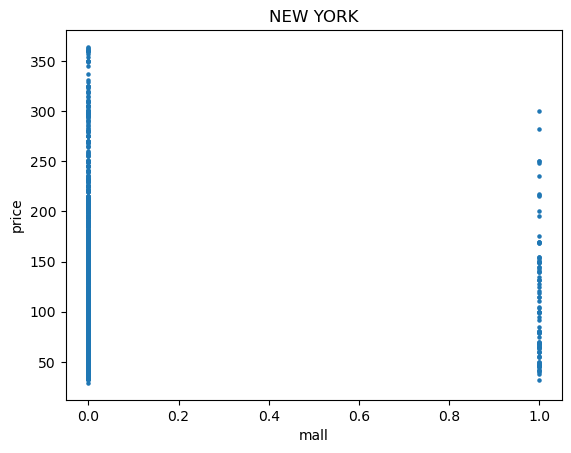

-1.124164260339771 0.1304716741012109


In [506]:
plt.scatter(df_ny['mall_n'], df_ny['price'],s = 5)

plt.title('NEW YORK')
plt.xlabel('mall')
plt.ylabel('price')


plt.show()
g_0 = df_ny[df_ny['mall_n'] < 1]['price']
g_1 = df_ny[df_ny['mall_n'] >=1]['price']
z, p = ztest(g_1, g_0)
print(z,p/2)

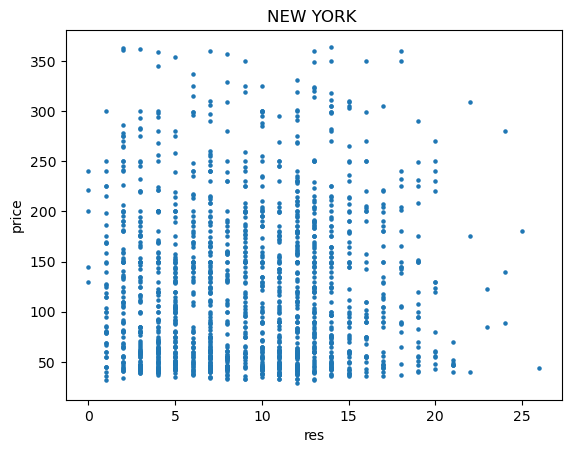

In [508]:
plt.scatter(df_ny['res_n'], df_ny['price'],s = 5)

plt.title('NEW YORK ')
plt.xlabel('res')
plt.ylabel('price')


plt.show()



In [504]:
g_0 = df_ny[df_ny['res_n'] <= 5]['price']
g_1 = df_ny[df_ny['res_n'] >= 15]['price']
z, p = ztest(g_1, g_0)
print(z,p/2)

2.0969718044263685 0.017998035682666502


In [39]:
'''g_0 = df_ny[df_ny['res_n'] <= 5]['price']
g_1 = df_ny[df_ny['res_n'] >= 10]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

"g_0 = df_ny[df_ny['res_n'] <= 5]['price']\ng_1 = df_ny[df_ny['res_n'] >= 10]['price']\nz, p = ztest(g_1, g_0)\nprint(z,p)"

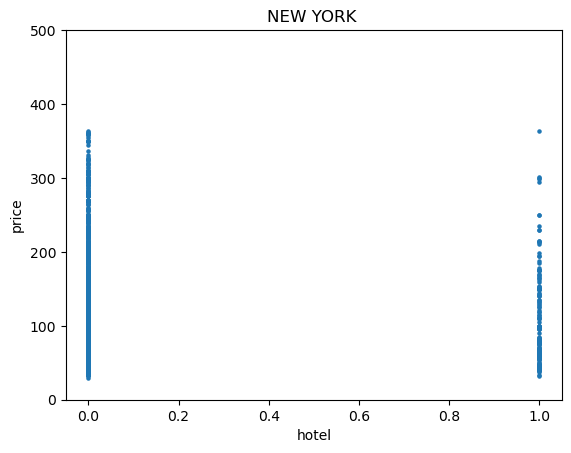

In [510]:
plt.scatter(df_ny['hotel_n'], df_ny['price'],s = 5)

plt.title('NEW YORK ')
plt.xlabel('hotel')
plt.ylabel('price')
plt.ylim(0, 500)

plt.show()

In [512]:
g_0 = df_ny[df_ny['hotel_n'] > 0]['price']
g_1 = df_ny[df_ny['hotel_n'] == 0]['price']
z, p = ztest(g_1, g_0)
print(z,p/2)

2.7247481858369196 0.0032175272839128416


# hk


In [8]:
df_hk = pd.read_csv('hk4.csv')
df_hk['price'] = df_hk['price'].str.replace(',', '')
df_hk['price'] = df_hk['price'].str.replace('$', '').astype(float)
Q1 = df_hk['price'].quantile(0.25)
Q3 = df_hk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_hk = df_hk[(df_hk['price'] >= lower_bound) & (df_hk['price'] <= upper_bound)]
print(df_hk.head(20))

         id neighbourhood_cleansed   latitude   longitude   price  subway_n  \
0    248140      Central & Western  22.282280  114.149230   800.0         0   
2    306515      Central & Western  22.283760  114.153130  1001.0        18   
3    505456      Central & Western  22.285430  114.148900   850.0         9   
4    792974      Central & Western  22.280444  114.150636  1031.0         0   
5    860892      Central & Western  22.282940  114.140810  1132.0         5   
6    944283      Central & Western  22.284570  114.153750  1249.0        23   
7    956857      Central & Western  22.283240  114.154180   390.0        26   
8    957513      Central & Western  22.285260  114.147370   875.0         3   
9    992390      Central & Western  22.282720  114.153070   646.0        15   
10  1016855      Central & Western  22.286650  114.150540   180.0        10   
11  1019390      Central & Western  22.285890  114.151490   600.0        10   
12  1108132      Central & Western  22.280710  114.1

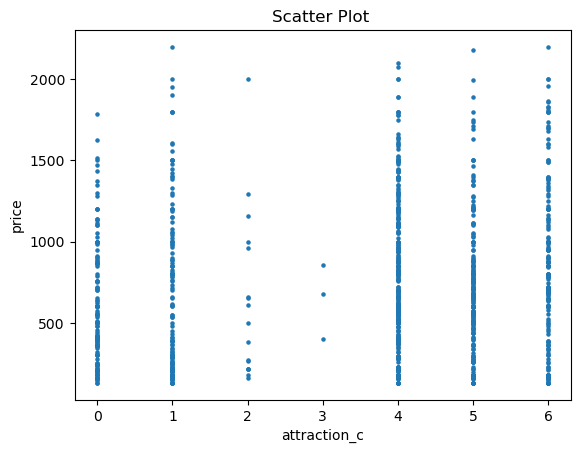

2.2755372309556523 0.022873721887645544


In [393]:
plt.scatter(df_hk['attraction_c'], df_hk['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('attraction_c')
plt.ylabel('price')


plt.show()
g_0 = df_hk[df_hk['attraction_c'] < 2 ]['price']
g_1 = df_hk[df_hk['attraction_c'] > 4]['price']
z, p = ztest(g_1, g_0)
print(z,p)

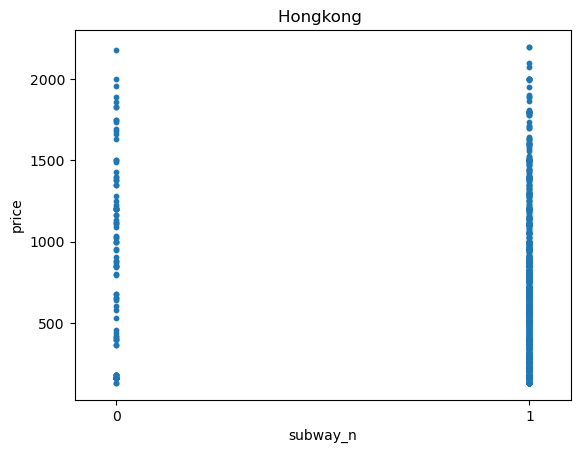

-5.448824710419778 5.070375405120346e-08


,count,mean,std,min,25%,50%,75%,max
subway_n,,,,,,,,
0,100.0,887.350000,570.130259,130.0,360.0,892.5,1257.75,2180.0
1,1105.0,620.770136,458.289635,130.0,190.0,550.0,880.00,2200.0


In [10]:
df_hk['subway_n'] = df_hk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_hk['subway_n'], df_hk['price'],s = 10)

plt.title('Hongkong ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_hk[df_hk['subway_n'] == 0]['price']
g_1 = df_hk[df_hk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
df_hk.groupby('subway_n')['price'].describe()

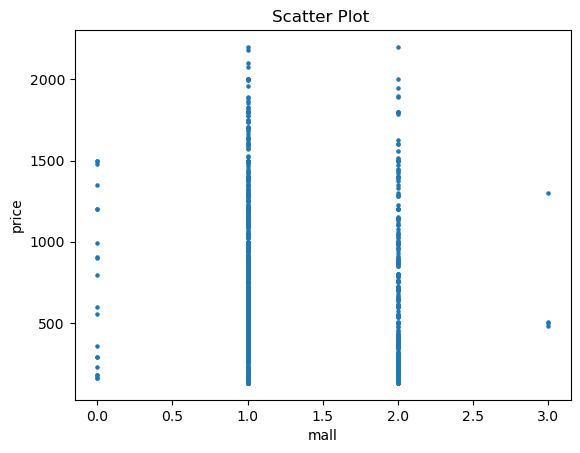

-2.471875837421301 0.013440618844822833


In [399]:
plt.scatter(df_hk['mall_n'], df_hk['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('mall')
plt.ylabel('price')


plt.show()
g_0 = df_hk[df_hk['mall_n'] <=1]['price']
g_1 = df_hk[df_hk['mall_n'] > 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

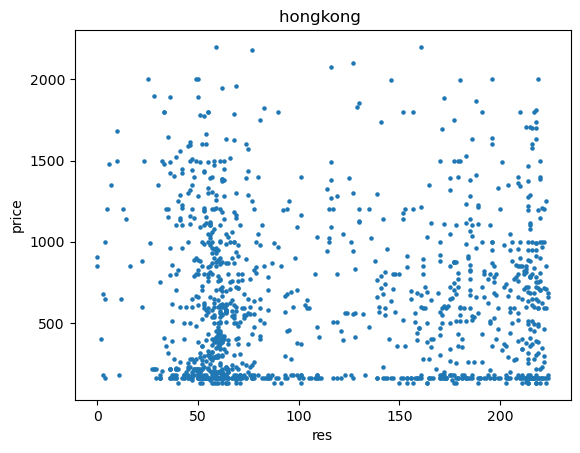

-2.927199402285656 0.0034202951358217448


In [28]:
plt.scatter(df_hk['res_n'], df_hk['price'],s = 5)

plt.title('hongkong ')
plt.xlabel('res')
plt.ylabel('price')


plt.show()
g_0 = df_hk[df_hk['res_n'] <= 30]['price']
g_1 = df_hk[df_hk['res_n'] >= 60]['price']
z, p = ztest(g_1, g_0)
print(z,p)

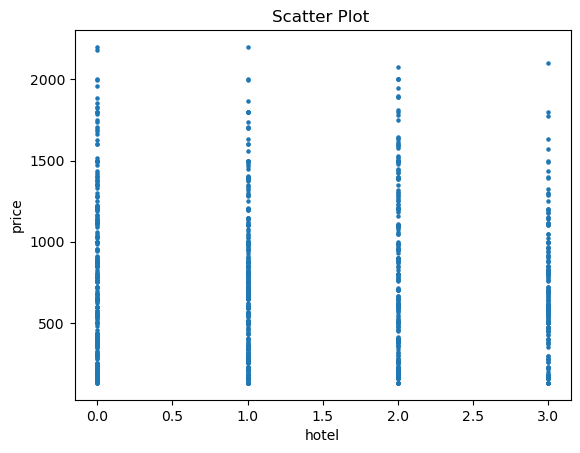

-39.99986762832923 0.0


In [413]:
plt.scatter(df_hk['hotel_n'], df_hk['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('hotel')
plt.ylabel('price')


plt.show()
g_0 = df_hk[df_hk['hotel_n'] >= 1]['price']
g_1 = df_ny[df_ny['hotel_n'] < 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

In [30]:
df_hk = pd.read_csv('hk3.csv')
df_hk['price'] = df_hk['price'].str.replace(',', '')
df_hk['price'] = df_hk['price'].str.replace('$', '').astype(float)
Q1 = df_hk['price'].quantile(0.25)
Q3 = df_hk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_hk = df_hk[(df_hk['price'] >= lower_bound) & (df_hk['price'] <= upper_bound)]
print(df_hk.head(20))

         id neighbourhood_cleansed   latitude   longitude   price  subway_n  \
0    645404          Yau Tsim Mong  22.325320  114.164330   260.0         6   
1    646645          Yau Tsim Mong  22.325320  114.164330   508.0         6   
2    728122          Yau Tsim Mong  22.318070  114.170810   210.0        19   
4    736732          Yau Tsim Mong  22.320260  114.172000  1015.0        19   
5    741955          Yau Tsim Mong  22.318280  114.170470   324.0        19   
6    742040          Yau Tsim Mong  22.317920  114.170420   291.0        19   
7    825791          Yau Tsim Mong  22.302090  114.176080   609.0         2   
8    861654          Yau Tsim Mong  22.307896  114.166949   729.0        10   
9    870046          Yau Tsim Mong  22.313180  114.168450   180.0         6   
10   894221          Yau Tsim Mong  22.314530  114.168630   180.0         8   
11   894224          Yau Tsim Mong  22.310060  114.171380   140.0         7   
12   903169          Yau Tsim Mong  22.311880  114.1

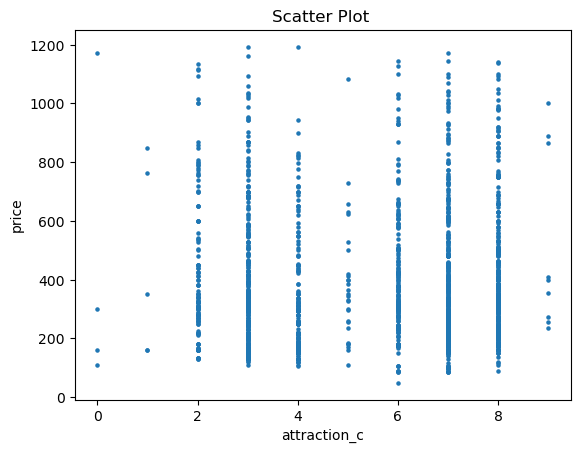

-1.1791210566367891 0.23834997504939026


In [484]:
plt.scatter(df_hk['attraction_c'], df_hk['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('attraction_c')
plt.ylabel('price')


plt.show()
g_0 = df_hk[df_hk['attraction_c'] < 3 ]['price']
g_1 = df_hk[df_hk['attraction_c'] > 4]['price']
z, p = ztest(g_1, g_0)
print(z,p)

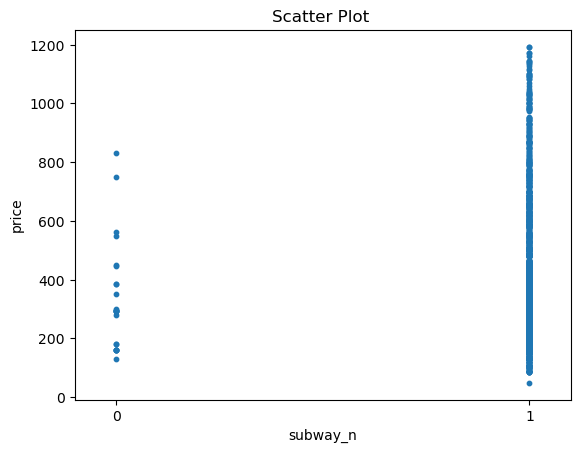

In [308]:
df_hk['subway_n'] = df_hk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_hk['subway_n'], df_hk['price'],s = 10)

plt.title('Scatter Plot ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()


In [55]:
g_0.mean(),g_1.mean()

(333.52, 378.7195828505214)

In [310]:
g_0 = df_hk[df_hk['subway_n'] == 0]['price']
g_1 = df_hk[df_hk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

0.9763588970042772 0.3288866427088174


In [106]:
'''g_0 = df_hk[df_hk['subway_n'] == 0]['price']
g_1 = df_hk[df_hk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

0.6281107195940295 0.5299314112616398


In [112]:
'''g_0.mean(),g_1.mean()
z, p = ztest(g_1, g_0)
print(z,p)'''

0.6281107195940295 0.5299314112616398


In [63]:
'''df_hk = pd.read_csv('hk2.csv')
df_hk['price'] = df_hk['price'].str.replace(',', '')
df_hk['price'] = df_hk['price'].str.replace('$', '').astype(float)
print(df_hk.head(20))
df_hk['subway_n'] = df_hk['subway_n'].apply(lambda x: 1 if x > 1 else x)
plt.scatter(df_hk['subway_n'], df_hk['price'],s = 10)

plt.title('Scatter Plot ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)
plt.ylim(0, 3000)

plt.show()'''

"df_hk = pd.read_csv('hk2.csv')\ndf_hk['price'] = df_hk['price'].str.replace(',', '')\ndf_hk['price'] = df_hk['price'].str.replace('$', '').astype(float)\nprint(df_hk.head(20))\ndf_hk['subway_n'] = df_hk['subway_n'].apply(lambda x: 1 if x > 1 else x)\nplt.scatter(df_hk['subway_n'], df_hk['price'],s = 10)\n\nplt.title('Scatter Plot ')\nplt.xlabel('subway_n')\nplt.ylabel('price')\nplt.xticks([0, 1])\nplt.xlim(-0.1, 1.1)\nplt.ylim(0, 3000)\n\nplt.show()"

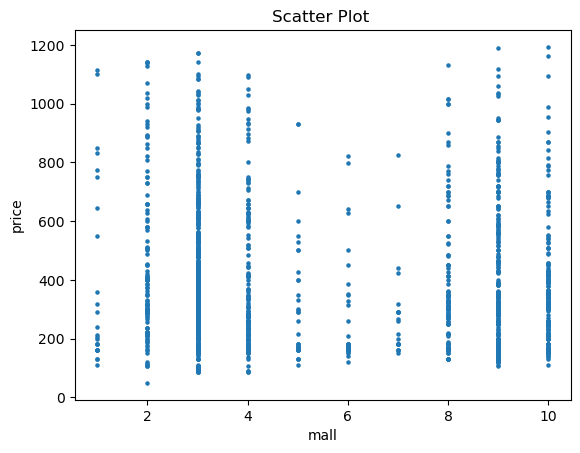

-0.2742623101574348 0.7838830464984596


In [312]:
plt.scatter(df_hk['mall_n'], df_hk['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('mall')
plt.ylabel('price')


plt.show()
g_0 = df_hk[df_hk['mall_n'] <=1]['price']
g_1 = df_hk[df_hk['mall_n'] > 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

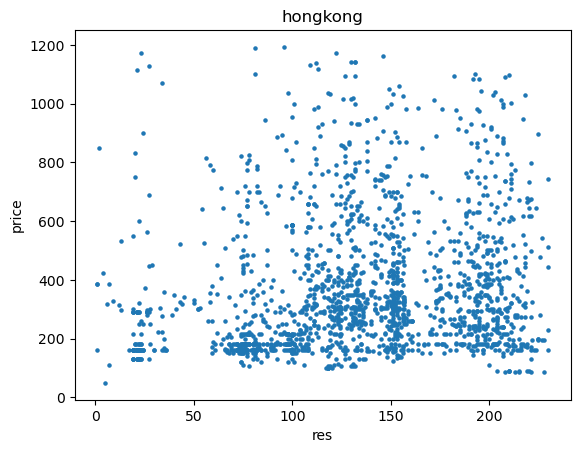

In [34]:
plt.scatter(df_hk['res_n'], df_hk['price'],s = 5)

plt.title('hongkong')
plt.xlabel('res')
plt.ylabel('price')


plt.show()

In [314]:
g_0 = df_hk[df_hk['res_n'] <= 20]['price']
g_1 = df_hk[df_hk['res_n'] >= 50]['price']
z, p = ztest(g_1, g_0)
print(z,p)

2.5026382699760505 0.012327146323942908


In [300]:
'''g_0 = df_hk[df_hk['res_n'] <= 30]['price']
g_1 = df_hk[df_hk['res_n'] > 100]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

0.7554173632956745 0.4499985982490087


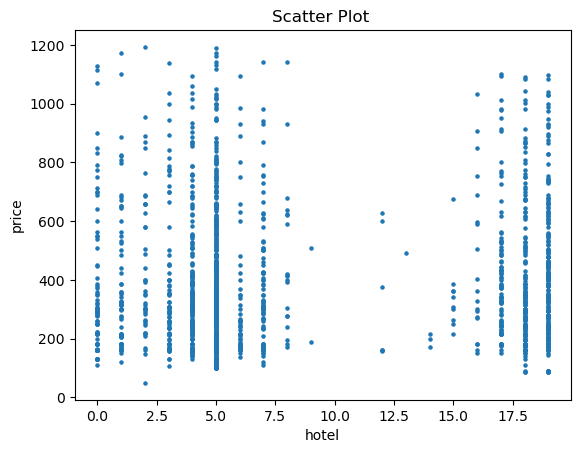

In [316]:
plt.scatter(df_hk['hotel_n'], df_hk['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('hotel')
plt.ylabel('price')


plt.show()

In [318]:



plt.show()
g_0 = df_hk[df_hk['hotel_n'] >= 1]['price']
g_1 = df_ny[df_ny['hotel_n'] < 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

-41.59153281574012 0.0


# par

       id neighbourhood_cleansed  latitude  longitude  price  subway_n  res_n  \
0  208080               Panthéon  48.85043    2.34916  300.0      13.0  224.0   
2  479634               Panthéon  48.84001    2.34101  159.0       1.0   50.0   

   bus_n  
0   34.0  
2   28.0  


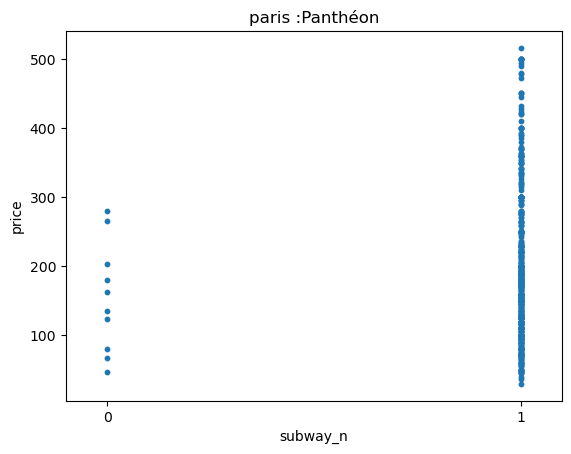

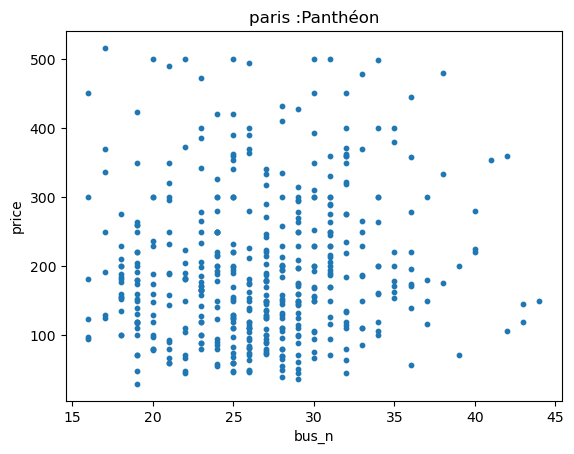

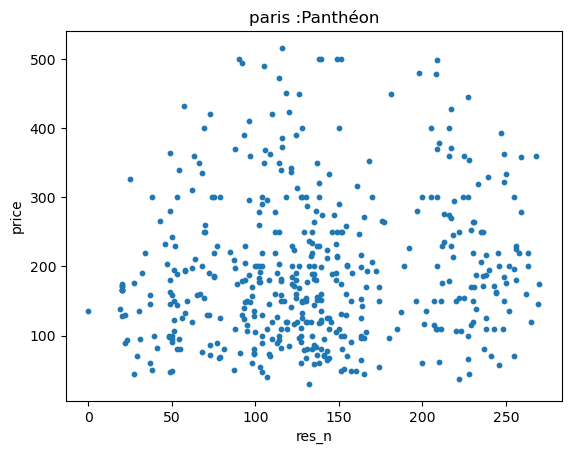

0.9787685774946921
26.619148936170212
136.6815286624204


In [23]:
df_par = pd.read_csv('p24.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(2))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris :'+df_par['neighbourhood_cleansed'][0])
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
plt.scatter(df_par['bus_n'], df_par['price'],s = 10)

plt.title('paris :'+df_par['neighbourhood_cleansed'][0])
plt.xlabel('bus_n')
plt.ylabel('price')



plt.show()
plt.scatter(df_par['res_n'], df_par['price'],s = 10)

plt.title('paris :'+df_par['neighbourhood_cleansed'][0])
plt.xlabel('res_n')
plt.ylabel('price')



plt.show()
print(df_par['subway_n'].mean())
print(df_par['bus_n'].mean())
print(df_par['res_n'].mean())

       id neighbourhood_cleansed  latitude  longitude  price  subway_n  res_n  \
0   10586      Buttes-Montmartre  48.88700   2.345310   80.0        10    149   
1  266725      Buttes-Montmartre  48.88676   2.333528  180.0         3    125   
2  168652      Buttes-Montmartre  48.88857   2.355040   96.0         9     51   
3   54377      Buttes-Montmartre  48.88927   2.359030  138.0         1     60   
4  423770      Buttes-Montmartre  48.88903   2.360540  250.0         1     52   

   bus_n  
0     36  
1     32  
2     22  
3     20  
4     23  


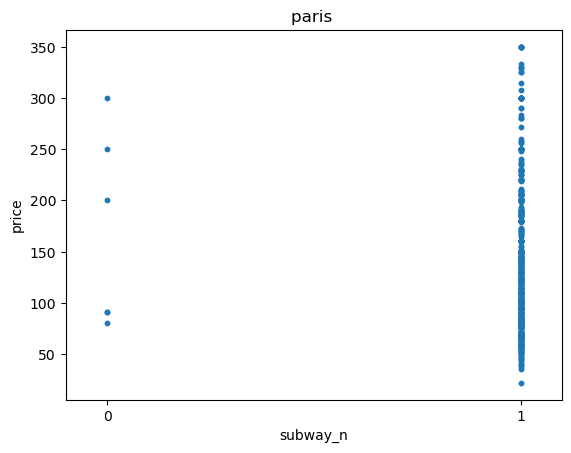

-1.160991565762405 0.24564532941836326
168.66666666666666 136.81597222222223
22.833333333333332 29.177083333333332
res
count    582.000000
mean     101.647766
std       51.686144
min        7.000000
25%       63.000000
50%       94.000000
75%      134.500000
max      239.000000
Name: res_n, dtype: float64
(2.571745571424675, 0.010118722430825226)
130.02189781021897 148.34
29.111683848797252
101.64776632302406 137.1443298969072 0.7411736700994763


In [366]:
df_par = pd.read_csv('p20.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(5))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_par[df_par['subway_n'] == 0]['price']
g_1 = df_par[df_par['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

b_0 = df_par[df_par['subway_n'] == 0]['bus_n']
b_1 = df_par[df_par['subway_n'] == 1]['bus_n']
print(g_0.mean(),g_1.mean())
print(b_0.mean(),b_1.mean())
print('res')
print(df_par['res_n'].describe())
r_0 = df_par[df_par['res_n'] <= 60]['price']
r_1 = df_par[df_par['res_n'] > 90]['price']
print(ztest(r_1, r_0))
print(r_0.mean(),r_1.mean())
print(df_par['bus_n'].mean())
print(df_par['res_n'].mean(),df_par['price'].mean(),df_par['res_n'].mean()/df_par['price'].mean())


       id neighbourhood_cleansed   latitude  longitude  price  subway_n  \
0  105210                 Temple  48.862812   2.352994  205.0        23   
1  165409                 Temple  48.866520   2.362610  138.0        23   
2  180950                 Temple  48.867740   2.359470   55.0        27   
3  302727                 Temple  48.863710   2.355780  140.0        14   
4  392431                 Temple  48.862870   2.365020  360.0        13   

   res_n  bus_n  
0    328     22  
1    199     24  
2    213     24  
3    251     21  
4    172     29  


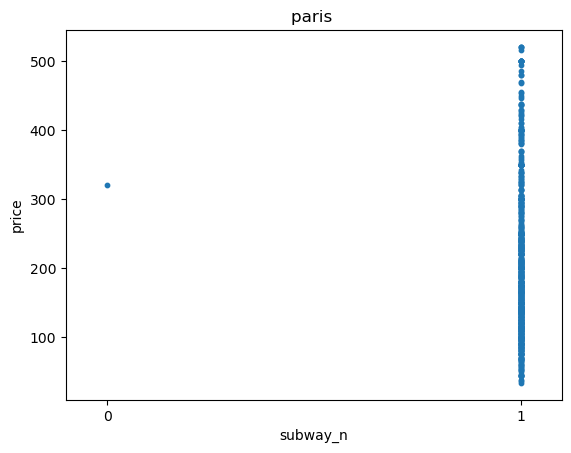

-1.0863495889740258 0.27732435548113255
320.0 205.9387755102041
19.0 22.474097331240188
res
count    638.000000
mean     222.470219
std       55.732414
min      122.000000
25%      174.250000
50%      216.000000
75%      258.000000
max      375.000000
Name: res_n, dtype: float64
(-2.384257791339322, 0.017113609361983702)
220.38125 196.54746835443038
22.468652037617556
222.47021943573668 206.11755485893417 1.0793365930815266


In [368]:
df_par = pd.read_csv('p21.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(5))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_par[df_par['subway_n'] == 0]['price']
g_1 = df_par[df_par['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

b_0 = df_par[df_par['subway_n'] == 0]['bus_n']
b_1 = df_par[df_par['subway_n'] == 1]['bus_n']
print(g_0.mean(),g_1.mean())
print(b_0.mean(),b_1.mean())
print('res')
print(df_par['res_n'].describe())
r_0 = df_par[df_par['res_n'] <= 174]['price']
r_1 = df_par[df_par['res_n'] > 216]['price']
print(ztest(r_1, r_0))
print(r_0.mean(),r_1.mean())
print(df_par['bus_n'].mean())
print(df_par['res_n'].mean(),df_par['price'].mean(),df_par['res_n'].mean()/df_par['price'].mean())


       id neighbourhood_cleansed   latitude  longitude  price  subway_n  \
0  301233    Batignolles-Monceau  48.887348   2.318053   76.0         7   
1  232293    Batignolles-Monceau  48.885180   2.297110   75.0         6   
2  682531    Batignolles-Monceau  48.882450   2.317500   80.0         5   
3  635408    Batignolles-Monceau  48.896240   2.327630  141.0         7   
4  607141    Batignolles-Monceau  48.888681   2.319435  195.0         8   

   res_n  bus_n  
0    149     29  
1     72     36  
2    131     25  
3     35     29  
4    114     35  


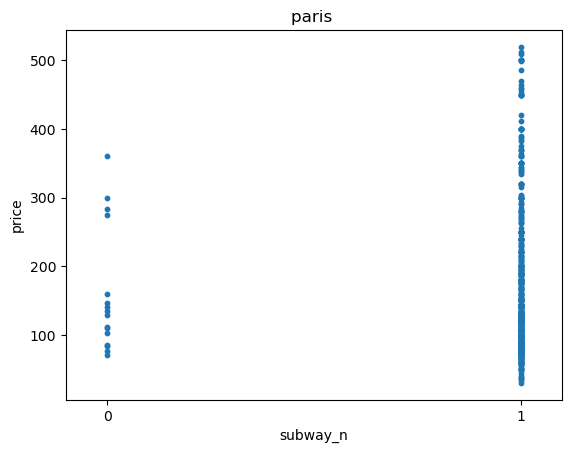

0.4355737059957246 0.663146051571953
160.4375 172.02904564315352
18.4375 28.53734439834025
res
count    498.000000
mean      97.562249
std       35.482435
min        7.000000
25%       72.000000
50%      103.000000
75%      118.000000
max      175.000000
Name: res_n, dtype: float64
(0.661624602622926, 0.5082118361787632)
164.92561983471074 172.5340909090909
28.21285140562249
97.56224899598394 171.65662650602408 0.5683570216997135


In [370]:
df_par = pd.read_csv('p22.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(5))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_par[df_par['subway_n'] == 0]['price']
g_1 = df_par[df_par['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

b_0 = df_par[df_par['subway_n'] == 0]['bus_n']
b_1 = df_par[df_par['subway_n'] == 1]['bus_n']
print(g_0.mean(),g_1.mean())
print(b_0.mean(),b_1.mean())
print('res')
print(df_par['res_n'].describe())
r_0 = df_par[df_par['res_n'] <= 70]['price']
r_1 = df_par[df_par['res_n'] > 100]['price']
print(ztest(r_1, r_0))
print(r_0.mean(),r_1.mean())
print(df_par['bus_n'].mean())
print(df_par['res_n'].mean(),df_par['price'].mean(),df_par['res_n'].mean()/df_par['price'].mean())

        id neighbourhood_cleansed  latitude  longitude  price  subway_n  \
0   536653                  Passy  48.86212    2.28226  285.0       9.0   
1   546396                  Passy  48.85630    2.28627  550.0       8.0   
2   784444                  Passy  48.84015    2.25173  160.0       9.0   
3  1053609                  Passy  48.84271    2.26835  280.0       2.0   
4  1395074                  Passy  48.83649    2.25758   73.0      10.0   

   res_n  bus_n  
0   40.0   27.0  
1   34.0   13.0  
2   29.0   24.0  
3   30.0   21.0  
4   49.0   26.0  


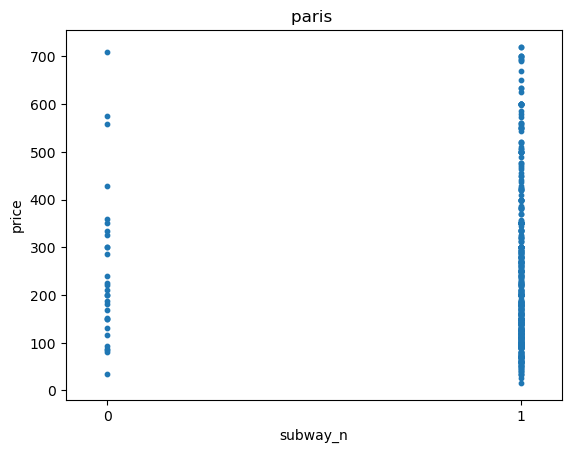

-0.5120097811614528 0.6086441640606104
247.96666666666667 232.86373165618448
16.733333333333334 21.861635220125788
res
count    507.000000
mean      37.327416
std       16.986838
min        1.000000
25%       26.000000
50%       37.000000
75%       48.000000
max       87.000000
Name: res_n, dtype: float64
(-0.746070346350238, 0.4556249213598982)
251.1851851851852 234.1346153846154
21.558185404339252
37.32741617357002 233.75739644970415 0.15968442813146017


In [372]:
df_par = pd.read_csv('p23.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(5))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_par[df_par['subway_n'] == 0]['price']
g_1 = df_par[df_par['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

b_0 = df_par[df_par['subway_n'] == 0]['bus_n']
b_1 = df_par[df_par['subway_n'] == 1]['bus_n']
print(g_0.mean(),g_1.mean())
print(b_0.mean(),b_1.mean())
print('res')
print(df_par['res_n'].describe())
r_0 = df_par[df_par['res_n'] <= 15]['price']
r_1 = df_par[df_par['res_n'] > 30]['price']
print(ztest(r_1, r_0))
print(r_0.mean(),r_1.mean())
print(df_par['bus_n'].mean())
print(df_par['res_n'].mean(),df_par['price'].mean(),df_par['res_n'].mean()/df_par['price'].mean())

       id neighbourhood_cleansed  latitude  longitude  price  subway_n  res_n  \
0  208080               Panthéon  48.85043    2.34916  300.0      13.0  224.0   
2  479634               Panthéon  48.84001    2.34101  159.0       1.0   50.0   
3  677231               Panthéon  48.85184    2.34644  275.0      17.0  216.0   
4  595610               Panthéon  48.84430    2.35608  210.0       7.0   64.0   
5  810951               Panthéon  48.84716    2.34787   60.0       8.0  200.0   

   bus_n  
0   34.0  
2   28.0  
3   32.0  
4   18.0  
5   25.0  


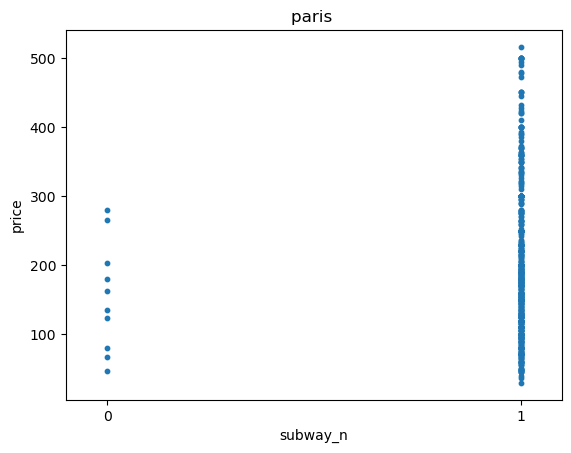

1.23338405758889 0.2174325100866522
154.4 195.77223427331887
23.555555555555557 26.678958785249456
res
count    471.000000
mean     136.681529
std       63.819230
min        0.000000
25%       95.000000
50%      130.000000
75%      175.000000
max      270.000000
Name: res_n, dtype: float64
(2.9202118381533286, 0.0034979352339270997)
152.48888888888888 200.6320474777448
26.619148936170212
136.6815286624204 194.89384288747345 0.7013127076638161


In [374]:
df_par = pd.read_csv('p24.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(5))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_par[df_par['subway_n'] == 0]['price']
g_1 = df_par[df_par['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

b_0 = df_par[df_par['subway_n'] == 0]['bus_n']
b_1 = df_par[df_par['subway_n'] == 1]['bus_n']
print(g_0.mean(),g_1.mean())
print(b_0.mean(),b_1.mean())
print('res')
print(df_par['res_n'].describe())
r_0 = df_par[df_par['res_n'] <= 50]['price']
r_1 = df_par[df_par['res_n'] > 100]['price']
print(ztest(r_1, r_0))
print(r_0.mean(),r_1.mean())
print(df_par['bus_n'].mean())
print(df_par['res_n'].mean(),df_par['price'].mean(),df_par['res_n'].mean()/df_par['price'].mean())

       id neighbourhood_cleansed  latitude  longitude  price  subway_n  res_n  \
0   10586      Buttes-Montmartre  48.88700   2.345310   80.0        10    149   
1  266725      Buttes-Montmartre  48.88676   2.333528  180.0         3    125   
2  168652      Buttes-Montmartre  48.88857   2.355040   96.0         9     51   
3   54377      Buttes-Montmartre  48.88927   2.359030  138.0         1     60   
4  423770      Buttes-Montmartre  48.88903   2.360540  250.0         1     52   

   bus_n  
0     36  
1     32  
2     22  
3     20  
4     23  


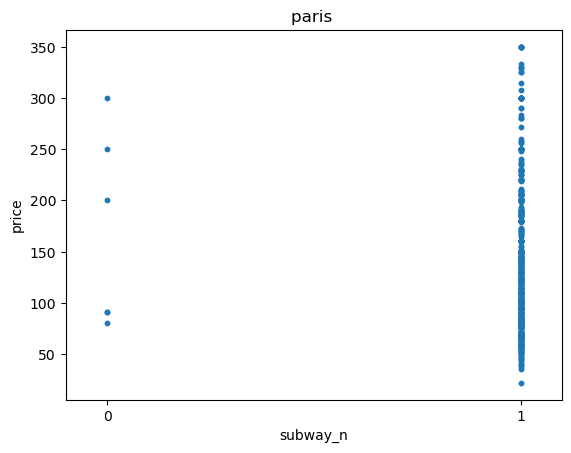

-1.160991565762405 0.24564532941836326
168.66666666666666 136.81597222222223
22.833333333333332 29.177083333333332


In [103]:
df_par = pd.read_csv('p20.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(5))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_par[df_par['subway_n'] == 0]['price']
g_1 = df_par[df_par['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

b_0 = df_par[df_par['subway_n'] == 0]['bus_n']
b_1 = df_par[df_par['subway_n'] == 1]['bus_n']
print(g_0.mean(),g_1.mean())
print(b_0.mean(),b_1.mean())

In [6]:
df_par = pd.read_csv('p10.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(20))

         id neighbourhood_cleansed   latitude  longitude  price  subway_n  \
0     10586      Buttes-Montmartre  48.887000   2.345310   80.0        10   
1    266725      Buttes-Montmartre  48.886760   2.333528  180.0         3   
2    168652      Buttes-Montmartre  48.888570   2.355040   96.0         9   
3     54377      Buttes-Montmartre  48.889270   2.359030  138.0         1   
4    423770      Buttes-Montmartre  48.889030   2.360540  250.0         1   
5    672334      Buttes-Montmartre  48.895750   2.345110  160.0         9   
7    751281      Buttes-Montmartre  48.889570   2.342560  185.0         3   
8    826329      Buttes-Montmartre  48.896393   2.333127   77.0         4   
10  1000418      Buttes-Montmartre  48.889050   2.363810  220.0         1   
11  1011441      Buttes-Montmartre  48.886920   2.336240  210.0         3   
12  1030228      Buttes-Montmartre  48.886490   2.355000   93.0        10   
13  1042480      Buttes-Montmartre  48.885230   2.334650  180.0         6   

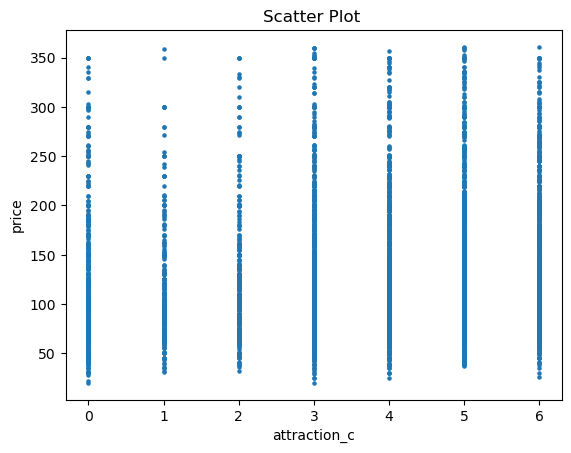

12.072336487072775 1.4787518982618828e-33


In [522]:
plt.scatter(df_par['attraction_c'], df_par['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('attraction_c')
plt.ylabel('price')


plt.show()
g_0 = df_par[df_par['attraction_c'] < 2 ]['price']
g_1 = df_par[df_par['attraction_c'] >= 4]['price']
z, p = ztest(g_1, g_0)
print(z,p)

In [21]:
df_par = pd.read_csv('p25.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
df_par.to_csv('p34.csv')

In [55]:
df_par = pd.read_csv('p20.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
print(df_par.head(5))
'''df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_par[df_par['subway_n'] == 0]['price']
g_1 = df_par[df_par['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_0.mean(),g_1.mean()'''

       id neighbourhood_cleansed  latitude  longitude  price  subway_n  res_n  \
0   10586      Buttes-Montmartre  48.88700   2.345310   80.0        10    149   
1  266725      Buttes-Montmartre  48.88676   2.333528  180.0         3    125   
2  168652      Buttes-Montmartre  48.88857   2.355040   96.0         9     51   
3   54377      Buttes-Montmartre  48.88927   2.359030  138.0         1     60   
4  423770      Buttes-Montmartre  48.88903   2.360540  250.0         1     52   

   bus_n  
0     36  
1     32  
2     22  
3     20  
4     23  


"df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)\nplt.scatter(df_par['subway_n'], df_par['price'],s = 10)\n\nplt.title('paris ')\nplt.xlabel('subway_n')\nplt.ylabel('price')\nplt.xticks([0, 1])\nplt.xlim(-0.1, 1.1)\n\n\nplt.show()\ng_0 = df_par[df_par['subway_n'] == 0]['price']\ng_1 = df_par[df_par['subway_n'] == 1]['price']\nz, p = ztest(g_1, g_0)\nprint(z,p)\ng_0.mean(),g_1.mean()"

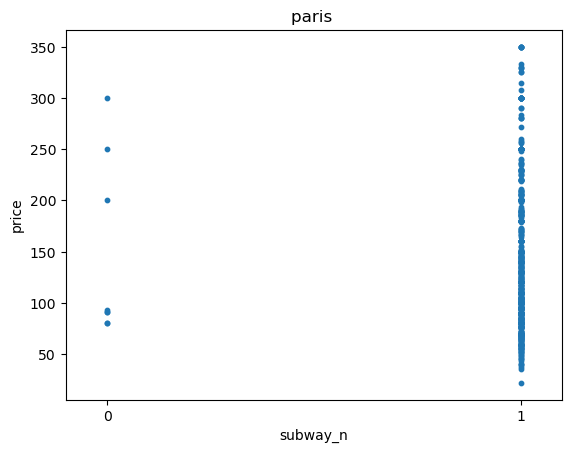

In [8]:
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()

       id neighbourhood_cleansed  latitude  longitude  price  subway_n  res_n
0   10586      Buttes-Montmartre  48.88700   2.345310   80.0        10    149
1  266725      Buttes-Montmartre  48.88676   2.333528  180.0         3    125
2  168652      Buttes-Montmartre  48.88857   2.355040   96.0         9     51
3   54377      Buttes-Montmartre  48.88927   2.359030  138.0         1     60
4  423770      Buttes-Montmartre  48.88903   2.360540  250.0         1     52


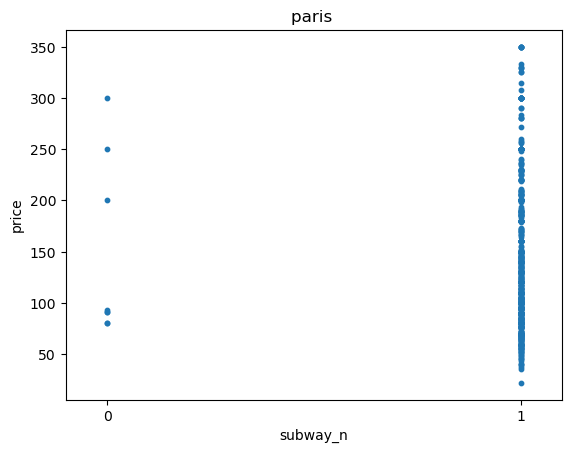

-0.4673495920844692 0.6402497809071572


(148.125, 136.99128919860627)

In [15]:
df_par = pd.read_csv('p10.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(5))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_par[df_par['subway_n'] == 0]['price']
g_1 = df_par[df_par['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_0.mean(),g_1.mean()


       id neighbourhood_cleansed   latitude  longitude  price  subway_n  res_n
0  105210                 Temple  48.862812   2.352994  205.0        23    323
1  165409                 Temple  48.866520   2.362610  138.0        23    199
2  180950                 Temple  48.867740   2.359470   55.0        27    213
3  302727                 Temple  48.863710   2.355780  140.0        14    246
4  392431                 Temple  48.862870   2.365020  360.0        13    172


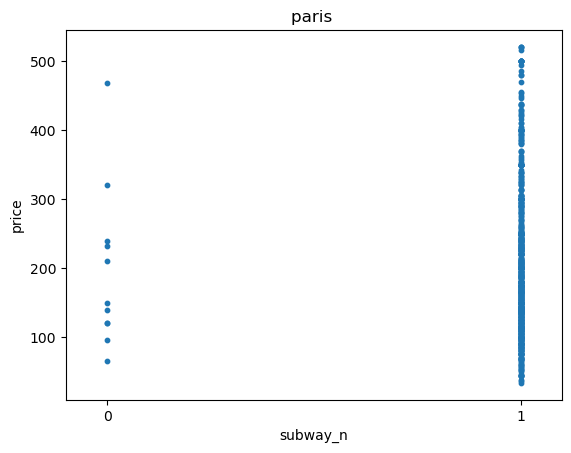

0.3078841353028554 0.7581704980030962


(196.45454545454547, 206.28708133971293)

In [17]:
df_par = pd.read_csv('p11.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(5))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_par[df_par['subway_n'] == 0]['price']
g_1 = df_par[df_par['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_0.mean(),g_1.mean()

       id neighbourhood_cleansed   latitude  longitude  price  subway_n  res_n
0  301233    Batignolles-Monceau  48.887348   2.318053   76.0         7    149
1  232293    Batignolles-Monceau  48.885180   2.297110   75.0         6     72
2  682531    Batignolles-Monceau  48.882450   2.317500   80.0         5    131
3  635408    Batignolles-Monceau  48.896240   2.327630  141.0         7     35
4  607141    Batignolles-Monceau  48.888681   2.319435  195.0         8    114


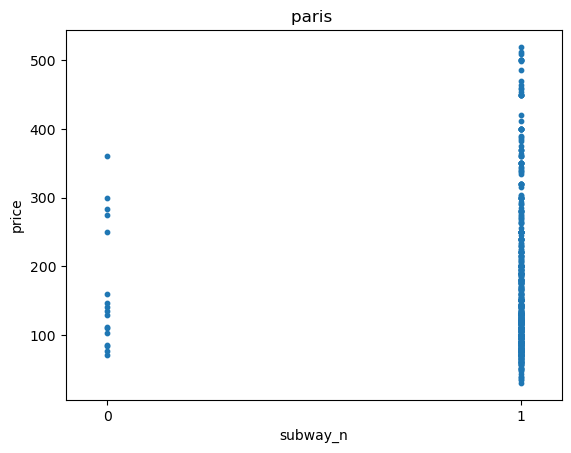

0.2383587865928432 0.8116028298155803


(165.7058823529412, 171.86694386694387)

In [19]:
df_par = pd.read_csv('p12.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(5))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_par[df_par['subway_n'] == 0]['price']
g_1 = df_par[df_par['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_0.mean(),g_1.mean()

        id neighbourhood_cleansed  latitude  longitude  price  subway_n  res_n
0   536653                  Passy  48.86212    2.28226  285.0         9     40
1   546396                  Passy  48.85630    2.28627  550.0         8     34
2   784444                  Passy  48.84015    2.25173  160.0         9     29
3  1053609                  Passy  48.84271    2.26835  280.0         2     30
4  1395074                  Passy  48.83649    2.25758   73.0        10     49


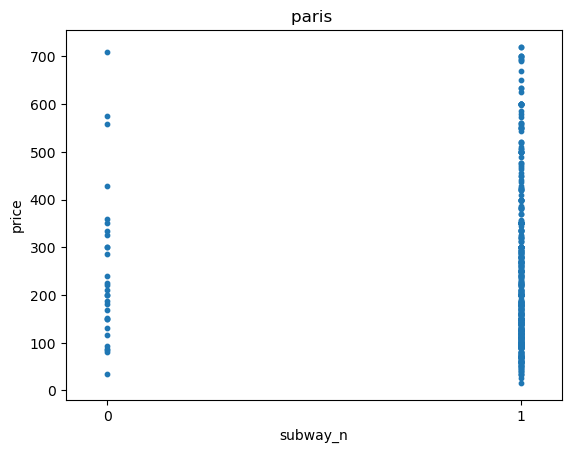

-0.5120097811614528 0.6086441640606104


(247.96666666666667, 232.86373165618448)

In [21]:
df_par = pd.read_csv('p13.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(5))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_par[df_par['subway_n'] == 0]['price']
g_1 = df_par[df_par['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_0.mean(),g_1.mean()

       id neighbourhood_cleansed  latitude  longitude  price  subway_n  res_n
0  208080               Panthéon  48.85043    2.34916  300.0        13    224
2  479634               Panthéon  48.84001    2.34101  159.0         1     50
3  677231               Panthéon  48.85184    2.34644  275.0        17    216
4  595610               Panthéon  48.84430    2.35608  210.0         7     64
5  810951               Panthéon  48.84716    2.34787   60.0         8    200


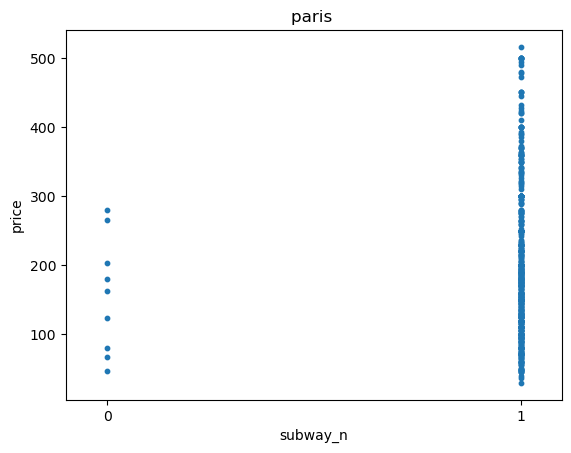

1.1062555536094474 0.26861592363918674


(156.55555555555554, 195.64069264069263)

In [23]:
df_par = pd.read_csv('p14.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(5))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('paris ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_par[df_par['subway_n'] == 0]['price']
g_1 = df_par[df_par['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_0.mean(),g_1.mean()

In [91]:
'''df_par = pd.read_csv('par2.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
print(df_par.head(20))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x > 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('Scatter Plot ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)
plt.ylim(0, 1000)

plt.show()'''

"df_par = pd.read_csv('par2.csv')\ndf_par['price'] = df_par['price'].str.replace(',', '')\ndf_par['price'] = df_par['price'].str.replace('$', '').astype(float)\nprint(df_par.head(20))\ndf_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x > 1 else x)\nplt.scatter(df_par['subway_n'], df_par['price'],s = 10)\n\nplt.title('Scatter Plot ')\nplt.xlabel('subway_n')\nplt.ylabel('price')\nplt.xticks([0, 1])\nplt.xlim(-0.1, 1.1)\nplt.ylim(0, 1000)\n\nplt.show()"

In [10]:
g_0 = df_par[df_par['subway_n'] == 0]['price']
g_1 = df_par[df_par['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

-0.4673495920844692 0.6402497809071572


In [103]:
g_0.mean(),g_1.mean()

(126.18181818181819, 134.0713525026624)

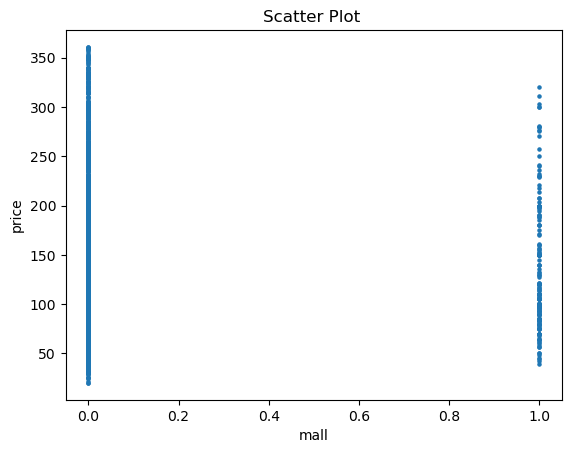

-0.6513123757518725 0.5148448611376835


In [528]:
plt.scatter(df_par['mall_n'], df_par['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('mall')
plt.ylabel('price')


plt.show()
g_0 = df_par[df_par['mall_n'] == 0]['price']
g_1 = df_par[df_par['mall_n'] >= 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

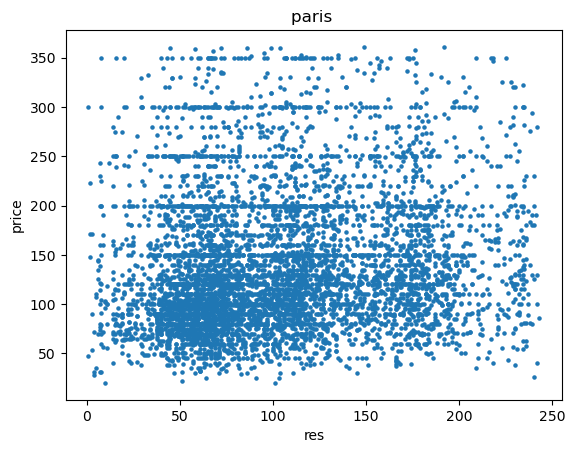

In [36]:
plt.scatter(df_par['res_n'], df_par['price'],s = 5)

plt.title('paris ')
plt.xlabel('res')
plt.ylabel('price')


plt.show()

In [532]:
g_0 = df_par[df_par['res_n'] <= 30]['price']
g_1 = df_par[df_par['res_n'] >= 60]['price']
z, p = ztest(g_1, g_0)
print(z,p)

3.0103327289361808 0.0026096164271965563


In [127]:
'''g_0 = df_par[df_par['res_n'] <= 75]['price']
g_1 = df_par[df_par['res_n'] >= 150]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

"g_0 = df_par[df_par['res_n'] <= 75]['price']\ng_1 = df_par[df_par['res_n'] >= 150]['price']\nz, p = ztest(g_1, g_0)\nprint(z,p)"

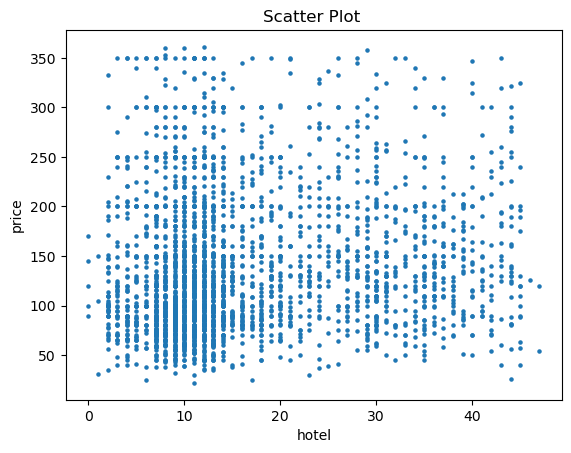

In [451]:
plt.scatter(df_par['hotel_n'], df_par['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('hotel')
plt.ylabel('price')


plt.show()

In [453]:
g_0 = df_par[df_par['hotel_n'] >  3]['price']
g_1 = df_par[df_par['hotel_n'] <= 3]['price']
z, p = ztest(g_1, g_0)
print(z,p)

-2.1352681540323686 0.03273911264386767


# mex

In [31]:
df_mex = pd.read_csv('m24.csv')
df_mex['price'] = df_mex['price'].str.replace(',', '')
df_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)
Q1 = df_mex['price'].quantile(0.25)
Q3 = df_mex['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_mex = df_mex[(df_mex['price'] >= lower_bound) & (df_mex['price'] <= upper_bound)]

df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
df_mex.to_csv('m34.csv')

In [35]:
df_mex = pd.read_csv('m24.csv')
df_mex['price'] = df_mex['price'].str.replace(',', '')
df_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)
Q1 = df_mex['price'].quantile(0.25)
Q3 = df_mex['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_mex = df_mex[(df_mex['price'] >= lower_bound) & (df_mex['price'] <= upper_bound)]
print(df_mex.head(2))


df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
print(df_mex['subway_n'].mean(),df_mex['bus_n'].mean(),df_mex['res_n'].mean())
print(df_mex['bus_n'].mean())
print(df_mex['res_n'].mean())

        id neighbourhood_cleansed  latitude  longitude  price  subway_n  \
0   607833      Gustavo A. Madero  19.48321  -99.11241  366.0       0.0   
1  7047856      Gustavo A. Madero  19.51677  -99.15830  500.0       0.0   

   res_n  bus_n  
0    4.0   12.0  
1    1.0    2.0  
0.3340961098398169 4.055045871559633 4.050343249427917
4.055045871559633
4.050343249427917


          id neighbourhood_cleansed   latitude  longitude   price  subway_n  \
0     256555         Miguel Hidalgo  19.406630 -99.186530  3041.0         4   
1    1403168         Miguel Hidalgo  19.402880 -99.178840   559.0         2   
2     654106         Miguel Hidalgo  19.443330 -99.184970   623.0         0   
3    2094427         Miguel Hidalgo  19.435730 -99.189550  1200.0         3   
4    4118496         Miguel Hidalgo  19.437920 -99.196470  2064.0         0   
5    4391108         Miguel Hidalgo  19.431500 -99.207950   733.0         0   
6    3624106         Miguel Hidalgo  19.412390 -99.183980   700.0         0   
7    4492814         Miguel Hidalgo  19.424890 -99.177240  1832.0         3   
9    6611525         Miguel Hidalgo  19.431861 -99.205294  2473.0         0   
10   6114798         Miguel Hidalgo  19.405350 -99.243060  1245.0         0   
11   7826731         Miguel Hidalgo  19.436900 -99.182370   980.0         0   
12   8100204         Miguel Hidalgo  19.437250 -99.1

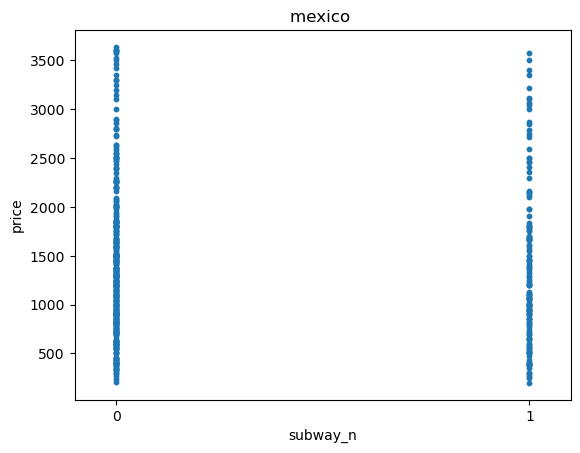

-0.5388826204170531 0.5899678499867824
1409.6257142857144 1367.8181818181818
0.7200811359026369
after merging
-1.1192715503209618 0.26302430902591856
1433.129151291513 1354.0045045045044
res
count    493.000000
mean      12.685598
std       14.524458
min        0.000000
25%        4.000000
50%        7.000000
75%       16.000000
max       76.000000
Name: res_n, dtype: float64
(7.374538224843404, 1.6491565795281148e-13)
1102.2944785276075 1680.8591549295775
12.685598377281947 1397.498985801217 0.009077357841522162


In [396]:
df_mex = pd.read_csv('m20.csv')
df_mex['price'] = df_mex['price'].str.replace(',', '')
df_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)
Q1 = df_mex['price'].quantile(0.25)
Q3 = df_mex['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_mex = df_mex[(df_mex['price'] >= lower_bound) & (df_mex['price'] <= upper_bound)]
print(df_mex.head(20))


df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_mex['subway_n'], df_mex['price'],s = 10)

plt.title('mexico ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
print(g_0.mean(),g_1.mean())
print(df_mex['bus_n'].mean())
df_mex['subway_n'] = df_mex['subway_n'] + df_mex['bus_n']
df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print('after merging')
print(z,p)
print(g_0.mean(),g_1.mean())
print('res')
print(df_mex['res_n'].describe())
r_0 = df_mex[df_mex['res_n'] <=4]['price']
r_1 = df_mex[df_mex['res_n'] >=10 ]['price']
print(ztest(r_1, r_0))
print(r_0.mean(),r_1.mean())
print(df_mex['res_n'].mean(),df_mex['price'].mean(),df_mex['res_n'].mean()/df_mex['price'].mean())

          id neighbourhood_cleansed   latitude  longitude   price  subway_n  \
0     898633             Cuauhtémoc  19.420630 -99.165860  1652.0         0   
1     287940             Cuauhtémoc  19.412360 -99.175330   641.0         0   
3     704779             Cuauhtémoc  19.431030 -99.146610  1106.0         2   
4    3916192             Cuauhtémoc  19.420214 -99.169487  2172.0         4   
5    3688757             Cuauhtémoc  19.414410 -99.163230  1953.0         0   
6    4720795             Cuauhtémoc  19.421783 -99.168343  1007.0         4   
7    5191149             Cuauhtémoc  19.418174 -99.165321  1306.0         0   
8    5065732             Cuauhtémoc  19.413963 -99.176004  1774.0         0   
9    5497778             Cuauhtémoc  19.409600 -99.169460  2017.0         4   
11   6144126             Cuauhtémoc  19.415590 -99.177940   498.0         0   
12   7072606             Cuauhtémoc  19.407650 -99.169120  1282.0         4   
13   8227391             Cuauhtémoc  19.424750 -99.1

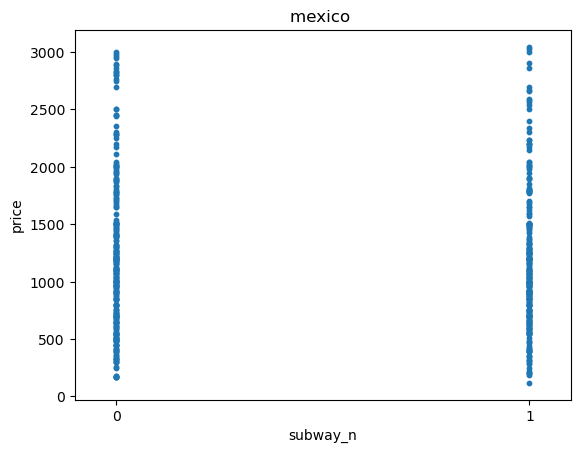

-1.0189227356030077 0.30823964906312806
1198.651851851852 1142.989010989011
5.626151012891344
after merging
2.0531771773974756 0.04005539702897334
1019.0307692307692 1191.2866108786611
res
count    543.000000
mean      39.725599
std       23.252430
min        0.000000
25%       20.500000
50%       37.000000
75%       59.000000
max       92.000000
Name: res_n, dtype: float64
(4.612996993077973, 3.969040468865845e-06)
645.7307692307693 1230.0941422594142
39.7255985267035 1170.6666666666667 0.03393416730640959


In [398]:
df_mex = pd.read_csv('m21.csv')
df_mex['price'] = df_mex['price'].str.replace(',', '')
df_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)
Q1 = df_mex['price'].quantile(0.25)
Q3 = df_mex['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_mex = df_mex[(df_mex['price'] >= lower_bound) & (df_mex['price'] <= upper_bound)]
print(df_mex.head(20))


df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_mex['subway_n'], df_mex['price'],s = 10)

plt.title('mexico ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
print(g_0.mean(),g_1.mean())
print(df_mex['bus_n'].mean())
df_mex['subway_n'] = df_mex['subway_n'] + df_mex['bus_n']
df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print('after merging')
print(z,p)
print(g_0.mean(),g_1.mean())
print('res')
print(df_mex['res_n'].describe())
r_0 = df_mex[df_mex['res_n'] <=4]['price']
r_1 = df_mex[df_mex['res_n'] >=10 ]['price']
print(ztest(r_1, r_0))
print(r_0.mean(),r_1.mean())
print(df_mex['res_n'].mean(),df_mex['price'].mean(),df_mex['res_n'].mean()/df_mex['price'].mean())

         id neighbourhood_cleansed   latitude  longitude   price  subway_n  \
1   1309198               Coyoacán  19.343560 -99.128600   450.0         0   
2    331030               Coyoacán  19.345490 -99.158720  1300.0         0   
3    828714               Coyoacán  19.341830 -99.155330   824.0         0   
4   2547576               Coyoacán  19.347060 -99.165680   900.0         0   
5   2373420               Coyoacán  19.307290 -99.169620   430.0         0   
6   2942919               Coyoacán  19.346820 -99.166160   800.0         0   
7   4097894               Coyoacán  19.352910 -99.167640   790.0         0   
8   3479520               Coyoacán  19.352630 -99.162450   649.0         0   
9   4409975               Coyoacán  19.353980 -99.147780   872.0         0   
10  4776914               Coyoacán  19.350280 -99.176370  1300.0         0   
12  5021538               Coyoacán  19.337080 -99.182620   550.0         0   
13  5298333               Coyoacán  19.344470 -99.160630   440.0

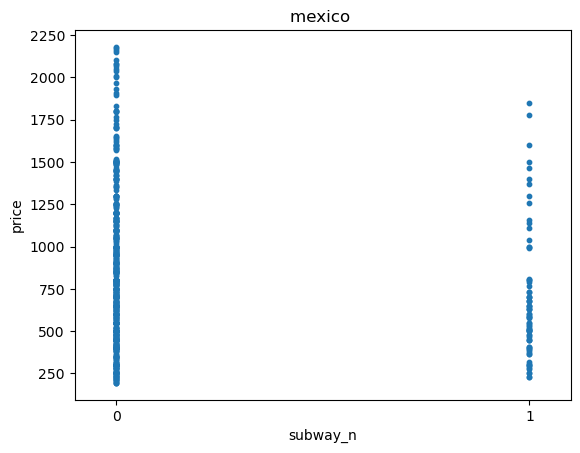

-2.762142869101482 0.0057423344895802374
829.155303030303 682.1948051948052
3.8016528925619837
after merging
-2.2661478849508248 0.02344233023318975
879.6601307189543 787.0243362831858
res
count    605.000000
mean      12.919008
std       13.773897
min        0.000000
25%        2.000000
50%        8.000000
75%       18.000000
max       50.000000
Name: res_n, dtype: float64
(5.522302478798557, 3.345858380516677e-08)
688.705 901.1814814814815
12.91900826446281 810.4512396694215 0.01594051268245626


In [400]:
df_mex = pd.read_csv('m22.csv')
df_mex['price'] = df_mex['price'].str.replace(',', '')
df_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)
Q1 = df_mex['price'].quantile(0.25)
Q3 = df_mex['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_mex = df_mex[(df_mex['price'] >= lower_bound) & (df_mex['price'] <= upper_bound)]
print(df_mex.head(20))


df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_mex['subway_n'], df_mex['price'],s = 10)

plt.title('mexico ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
print(g_0.mean(),g_1.mean())
print(df_mex['bus_n'].mean())
df_mex['subway_n'] = df_mex['subway_n'] + df_mex['bus_n']
df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print('after merging')
print(z,p)
print(g_0.mean(),g_1.mean())
print('res')
print(df_mex['res_n'].describe())
r_0 = df_mex[df_mex['res_n'] <=4]['price']
r_1 = df_mex[df_mex['res_n'] >=10 ]['price']
print(ztest(r_1, r_0))
print(r_0.mean(),r_1.mean())
print(df_mex['res_n'].mean(),df_mex['price'].mean(),df_mex['res_n'].mean()/df_mex['price'].mean())

          id neighbourhood_cleansed   latitude  longitude   price  subway_n  \
0    1945351                Tlalpan  19.283560 -99.218370   513.0         0   
1    4846536                Tlalpan  19.281250 -99.148320  1500.0         0   
2    6438939                Tlalpan  19.188080 -99.172780  1557.0         0   
3    6103192                Tlalpan  19.294140 -99.167000   509.0         0   
4    7460839                Tlalpan  19.279820 -99.142260   274.0         0   
5    7874052                Tlalpan  19.298320 -99.116400   300.0         0   
6    8761745                Tlalpan  19.299965 -99.147102   350.0         2   
7    9299896                Tlalpan  19.291300 -99.213480   300.0         0   
8    9349102                Tlalpan  19.288660 -99.144190   450.0         0   
9   12366374                Tlalpan  19.290430 -99.142700   350.0         0   
10  13256174                Tlalpan  19.296410 -99.123020   260.0         0   
11  14278552                Tlalpan  19.300610 -99.1

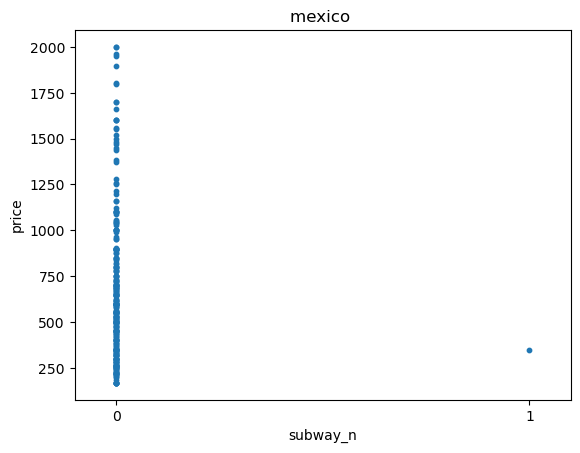

-0.7866418977640093 0.43149152540340097
669.0615384615385 350.0
0.4904214559386973
after merging
-0.17183557156184734 0.8635667993851943
670.5508021390374 660.9864864864865
res
count    261.000000
mean       3.662835
std        5.562349
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       24.000000
Name: res_n, dtype: float64
(-0.11354049380686508, 0.909602061212668)
665.7105263157895 659.6470588235294
3.6628352490421454 667.8390804597701 0.0054846075292875746


In [402]:
df_mex = pd.read_csv('m23.csv')
df_mex['price'] = df_mex['price'].str.replace(',', '')
df_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)
Q1 = df_mex['price'].quantile(0.25)
Q3 = df_mex['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_mex = df_mex[(df_mex['price'] >= lower_bound) & (df_mex['price'] <= upper_bound)]
print(df_mex.head(20))


df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_mex['subway_n'], df_mex['price'],s = 10)

plt.title('mexico ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
print(g_0.mean(),g_1.mean())
print(df_mex['bus_n'].mean())
df_mex['subway_n'] = df_mex['subway_n'] + df_mex['bus_n']
df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print('after merging')
print(z,p)
print(g_0.mean(),g_1.mean())
print('res')
print(df_mex['res_n'].describe())
r_0 = df_mex[df_mex['res_n'] <=0]['price']
r_1 = df_mex[df_mex['res_n'] >1 ]['price']
print(ztest(r_1, r_0))
print(r_0.mean(),r_1.mean())
print(df_mex['res_n'].mean(),df_mex['price'].mean(),df_mex['res_n'].mean()/df_mex['price'].mean())

          id neighbourhood_cleansed   latitude  longitude  price  subway_n  \
0     607833      Gustavo A. Madero  19.483210 -99.112410  366.0       0.0   
1    7047856      Gustavo A. Madero  19.516770 -99.158300  500.0       0.0   
2    7264288      Gustavo A. Madero  19.514940 -99.157720  500.0       0.0   
3   11574181      Gustavo A. Madero  19.456420 -99.097850  394.0       0.0   
4   12339895      Gustavo A. Madero  19.486387 -99.128075  310.0       6.0   
5   13764151      Gustavo A. Madero  19.498490 -99.129180  350.0       0.0   
6   14593430      Gustavo A. Madero  19.475750 -99.128330  250.0       2.0   
7   14647553      Gustavo A. Madero  19.450280 -99.070010  677.0       0.0   
9   17511153      Gustavo A. Madero  19.459960 -99.093270  551.0       0.0   
10  18706549      Gustavo A. Madero  19.487190 -99.143820  499.0       5.0   
11  20413029      Gustavo A. Madero  19.509720 -99.144770  643.0       0.0   
12  20918346      Gustavo A. Madero  19.470350 -99.098720  420.0

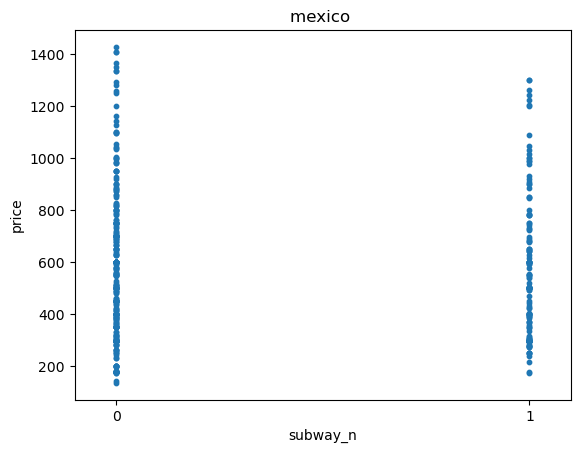

-0.6305796437974023 0.5283154122868664
573.2542955326461 555.3082191780821
4.055045871559633
after merging
-3.443668524087823 0.0005738788182169429
633.3333333333334 535.5661016949152
res
count    437.000000
mean       4.050343
std        4.348070
min        0.000000
25%        0.000000
50%        2.000000
75%        8.000000
max       15.000000
Name: res_n, dtype: float64
(-1.5139274910219227, 0.1300442307571406)
598.765625 554.2071197411003
4.050343249427917 567.258581235698 0.007140206218837234


In [406]:
df_mex = pd.read_csv('m24.csv')
df_mex['price'] = df_mex['price'].str.replace(',', '')
df_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)
Q1 = df_mex['price'].quantile(0.25)
Q3 = df_mex['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_mex = df_mex[(df_mex['price'] >= lower_bound) & (df_mex['price'] <= upper_bound)]
print(df_mex.head(20))


df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_mex['subway_n'], df_mex['price'],s = 10)

plt.title('mexico ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
print(g_0.mean(),g_1.mean())
print(df_mex['bus_n'].mean())
df_mex['subway_n'] = df_mex['subway_n'] + df_mex['bus_n']
df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print('after merging')
print(z,p)
print(g_0.mean(),g_1.mean())
print('res')
print(df_mex['res_n'].describe())
r_0 = df_mex[df_mex['res_n'] <1]['price']
r_1 = df_mex[df_mex['res_n'] >=1 ]['price']
print(ztest(r_1, r_0))
print(r_0.mean(),r_1.mean())
print(df_mex['res_n'].mean(),df_mex['price'].mean(),df_mex['res_n'].mean()/df_mex['price'].mean())

        id neighbourhood_cleansed  latitude  longitude   price  subway_n  \
0   256555         Miguel Hidalgo  19.40663  -99.18653  3041.0         4   
1  1403168         Miguel Hidalgo  19.40288  -99.17884   559.0         2   
2   654106         Miguel Hidalgo  19.44333  -99.18497   623.0         0   
3  2094427         Miguel Hidalgo  19.43573  -99.18955  1200.0         3   
4  4118496         Miguel Hidalgo  19.43792  -99.19647  2064.0         0   

   res_n  
0      5  
1      4  
2      2  
3     22  
4      5  


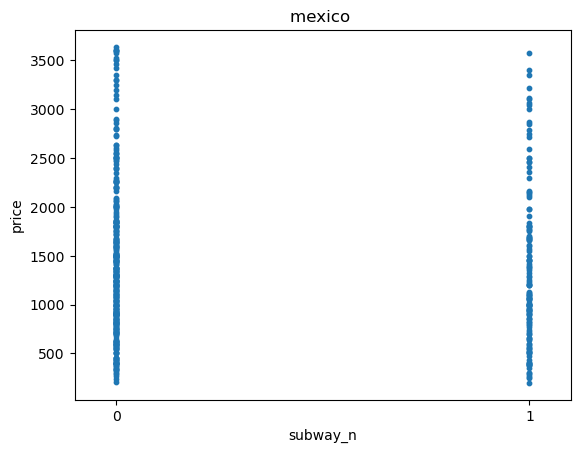

-0.8078029651613292 0.4192040179154889


(1415.5811965811965, 1352.8028169014085)

In [30]:
df_mex = pd.read_csv('m10.csv')
df_mex['price'] = df_mex['price'].str.replace(',', '')
df_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)
Q1 = df_mex['price'].quantile(0.25)
Q3 = df_mex['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_mex = df_mex[(df_mex['price'] >= lower_bound) & (df_mex['price'] <= upper_bound)]
print(df_mex.head(5))
df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_mex['subway_n'], df_mex['price'],s = 10)

plt.title('mexico ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_0.mean(),g_1.mean()

        id neighbourhood_cleansed   latitude  longitude   price  subway_n  \
0   898633             Cuauhtémoc  19.420630 -99.165860  1652.0         0   
1   287940             Cuauhtémoc  19.412360 -99.175330   641.0         0   
3   704779             Cuauhtémoc  19.431030 -99.146610  1106.0         2   
4  3916192             Cuauhtémoc  19.420214 -99.169487  2172.0         4   
5  3688757             Cuauhtémoc  19.414410 -99.163230  1953.0         0   

   res_n  
0     55  
1     78  
3     52  
4     48  
5     72  


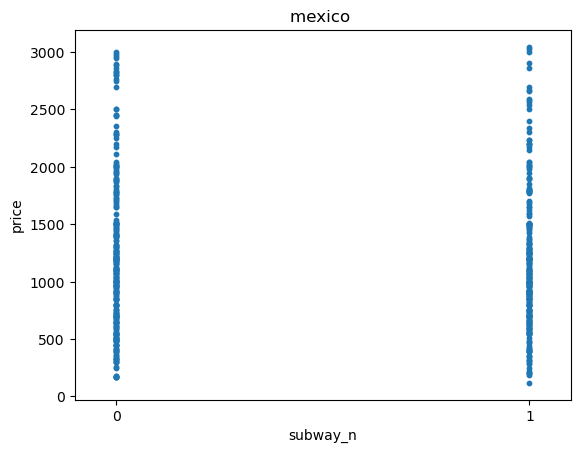

-1.0189227356030077 0.30823964906312806


(1198.651851851852, 1142.989010989011)

In [32]:
df_mex = pd.read_csv('m11.csv')
df_mex['price'] = df_mex['price'].str.replace(',', '')
df_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)
Q1 = df_mex['price'].quantile(0.25)
Q3 = df_mex['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_mex = df_mex[(df_mex['price'] >= lower_bound) & (df_mex['price'] <= upper_bound)]
print(df_mex.head(5))
df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_mex['subway_n'], df_mex['price'],s = 10)

plt.title('mexico ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_0.mean(),g_1.mean()

        id neighbourhood_cleansed  latitude  longitude   price  subway_n  \
1  1309198               Coyoacán  19.34356  -99.12860   450.0         0   
2   331030               Coyoacán  19.34549  -99.15872  1300.0         0   
3   828714               Coyoacán  19.34183  -99.15533   824.0         0   
4  2547576               Coyoacán  19.34706  -99.16568   900.0         0   
5  2373420               Coyoacán  19.30729  -99.16962   430.0         0   

   res_n  
1      0  
2     18  
3     12  
4     35  
5      6  


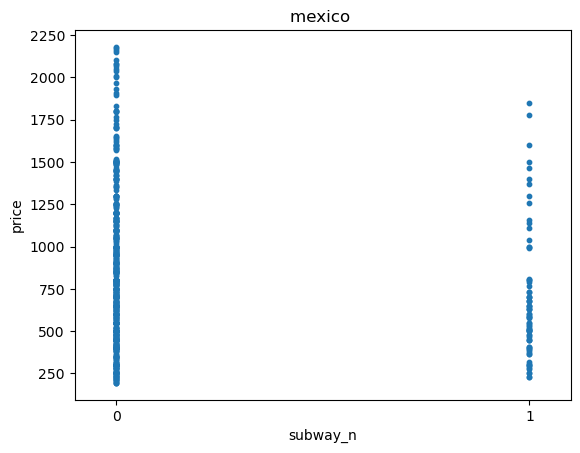

-2.762142869101482 0.0057423344895802374


(829.155303030303, 682.1948051948052)

In [36]:
df_mex = pd.read_csv('m12.csv')
df_mex['price'] = df_mex['price'].str.replace(',', '')
df_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)
Q1 = df_mex['price'].quantile(0.25)
Q3 = df_mex['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_mex = df_mex[(df_mex['price'] >= lower_bound) & (df_mex['price'] <= upper_bound)]
print(df_mex.head(5))
df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_mex['subway_n'], df_mex['price'],s = 10)

plt.title('mexico ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_0.mean(),g_1.mean()

        id neighbourhood_cleansed  latitude  longitude   price  subway_n  \
0  1945351                Tlalpan  19.28356  -99.21837   513.0         0   
1  4846536                Tlalpan  19.28125  -99.14832  1500.0         0   
2  6438939                Tlalpan  19.18808  -99.17278  1557.0         0   
3  6103192                Tlalpan  19.29414  -99.16700   509.0         0   
4  7460839                Tlalpan  19.27982  -99.14226   274.0         0   

   res_n  
0      0  
1      0  
2      0  
3      2  
4      1  


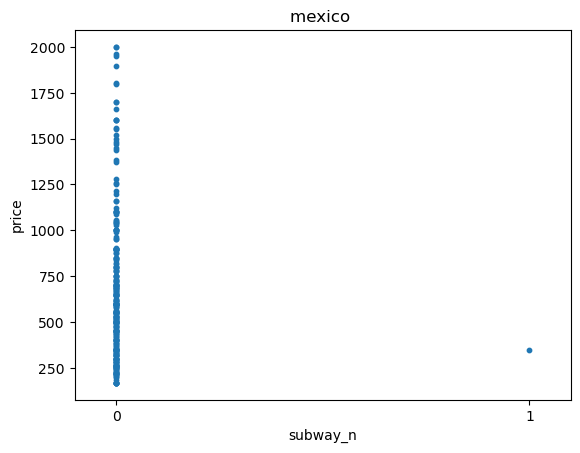

-0.7866418977640093 0.43149152540340097


(669.0615384615385, 350.0)

In [38]:
df_mex = pd.read_csv('m13.csv')
df_mex['price'] = df_mex['price'].str.replace(',', '')
df_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)
Q1 = df_mex['price'].quantile(0.25)
Q3 = df_mex['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_mex = df_mex[(df_mex['price'] >= lower_bound) & (df_mex['price'] <= upper_bound)]
print(df_mex.head(5))
df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_mex['subway_n'], df_mex['price'],s = 10)

plt.title('mexico ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_0.mean(),g_1.mean()

         id neighbourhood_cleansed   latitude  longitude  price  subway_n  \
0    607833      Gustavo A. Madero  19.483210 -99.112410  366.0         0   
1   7047856      Gustavo A. Madero  19.516770 -99.158300  500.0         0   
2   7264288      Gustavo A. Madero  19.514940 -99.157720  500.0         0   
3  11574181      Gustavo A. Madero  19.456420 -99.097850  394.0         0   
4  12339895      Gustavo A. Madero  19.486387 -99.128075  310.0         6   

   res_n  
0      4  
1      1  
2      1  
3      1  
4     13  


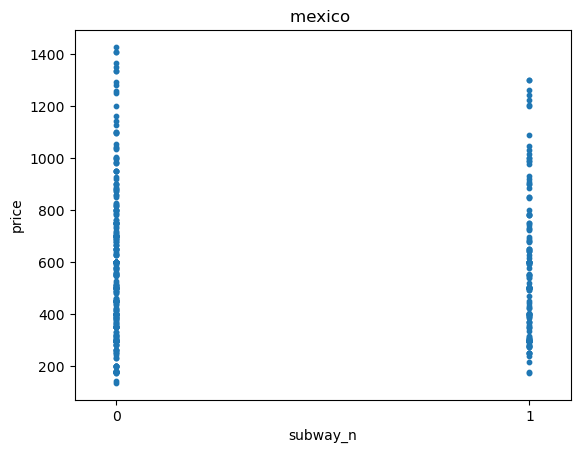

-0.6176890770485258 0.5367803135802027


(573.1620689655173, 555.6122448979592)

In [40]:
df_mex = pd.read_csv('m14.csv')
df_mex['price'] = df_mex['price'].str.replace(',', '')
df_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)
Q1 = df_mex['price'].quantile(0.25)
Q3 = df_mex['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_mex = df_mex[(df_mex['price'] >= lower_bound) & (df_mex['price'] <= upper_bound)]
print(df_mex.head(5))
df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_mex['subway_n'], df_mex['price'],s = 10)

plt.title('mexico ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_0.mean(),g_1.mean()

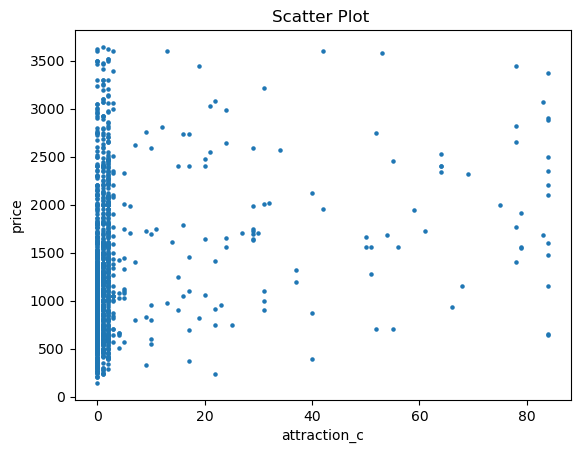

7.6480630845224695 2.0402912170513657e-14


In [262]:
plt.scatter(df_mex['attraction_c'], df_mex['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('attraction_c')
plt.ylabel('price')


plt.show()
g_0 = df_mex[df_mex['attraction_c'] < 2 ]['price']
g_1 = df_mex[df_mex['attraction_c'] >= 4]['price']
z, p = ztest(g_1, g_0)
print(z,p)

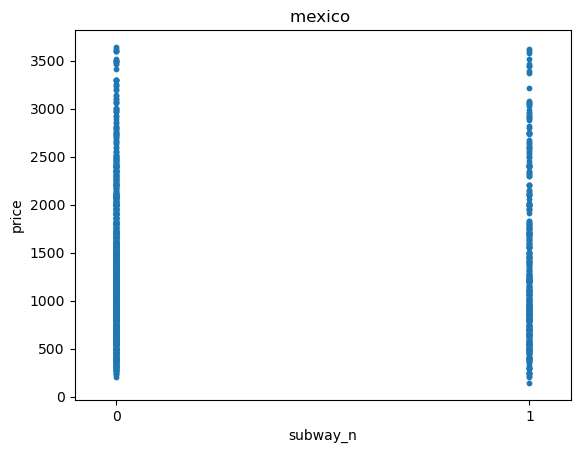

In [18]:
df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_mex['subway_n'], df_mex['price'],s = 10)

plt.title('mexico ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()

In [139]:
g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

-0.36310330328537543 0.716527717122449


In [141]:
g_0.mean(),g_1.mean()

(1340.128755364807, 1323.481894150418)

In [143]:
'''g_0 = df_mex[df_mex['subway_n'] == 0]['price']
g_1 = df_mex[df_mex['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

"g_0 = df_mex[df_mex['subway_n'] == 0]['price']\ng_1 = df_mex[df_mex['subway_n'] == 1]['price']\nz, p = ztest(g_1, g_0)\nprint(z,p)"

In [145]:
'''g_0.mean(),g_1.mean()'''

'g_0.mean(),g_1.mean()'

In [147]:
'''df_mex = pd.read_csv('mex2.csv')
df_mex['price'] = df_mex['price'].str.replace(',', '')
df_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)
print(df_mex.head(20))
df_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_mex['subway_n'], df_mex['price'],s = 10)

plt.title('Scatter Plot ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)
plt.ylim(0, 6000)

plt.show()'''

"df_mex = pd.read_csv('mex2.csv')\ndf_mex['price'] = df_mex['price'].str.replace(',', '')\ndf_mex['price'] = df_mex['price'].str.replace('$', '').astype(float)\nprint(df_mex.head(20))\ndf_mex['subway_n'] = df_mex['subway_n'].apply(lambda x: 1 if x >= 1 else x)\nplt.scatter(df_mex['subway_n'], df_mex['price'],s = 10)\n\nplt.title('Scatter Plot ')\nplt.xlabel('subway_n')\nplt.ylabel('price')\nplt.xticks([0, 1])\nplt.xlim(-0.1, 1.1)\nplt.ylim(0, 6000)\n\nplt.show()"

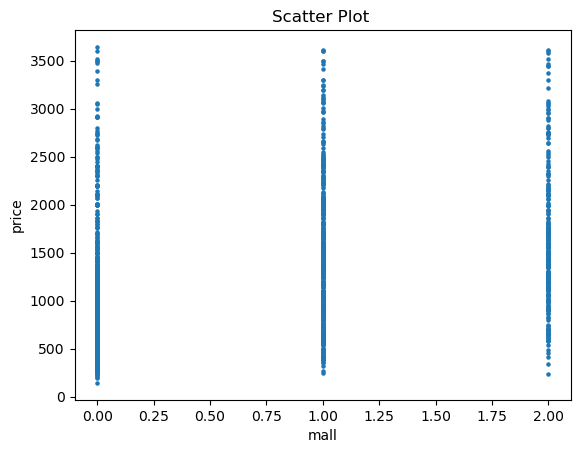

In [149]:
plt.scatter(df_mex['mall_n'], df_mex['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('mall')
plt.ylabel('price')


plt.show()

In [151]:
g_0 = df_mex[df_mex['mall_n'] < 1]['price']
g_1 = df_mex[df_mex['mall_n'] >=1 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)

11.418382236212476 3.3847577125888734e-30


In [264]:
'''g_0 = df_mex[df_mex['mall_n'] < 1]['price']
g_1 = df_mex[df_mex['mall_n'] >=1 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

3.799160150482924 0.0001451872541058457


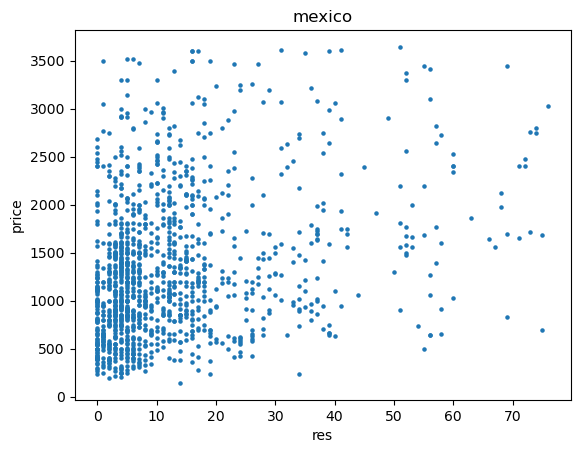

In [38]:
plt.scatter(df_mex['res_n'], df_mex['price'],s = 5)

plt.title('mexico')
plt.xlabel('res')
plt.ylabel('price')


plt.show()

In [155]:
g_0 = df_mex[df_mex['res_n'] <=5]['price']
g_1 = df_mex[df_mex['res_n'] >=30 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)

10.916104472066866 9.654854564786564e-28


In [157]:
'''g_0 = df_mex[df_mex['res_n'] < 20]['price']
g_1 = df_mex[df_mex['res_n'] >=40 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

"g_0 = df_mex[df_mex['res_n'] < 20]['price']\ng_1 = df_mex[df_mex['res_n'] >=40 ]['price']\nz, p = ztest(g_1, g_0)\nprint(z,p)"

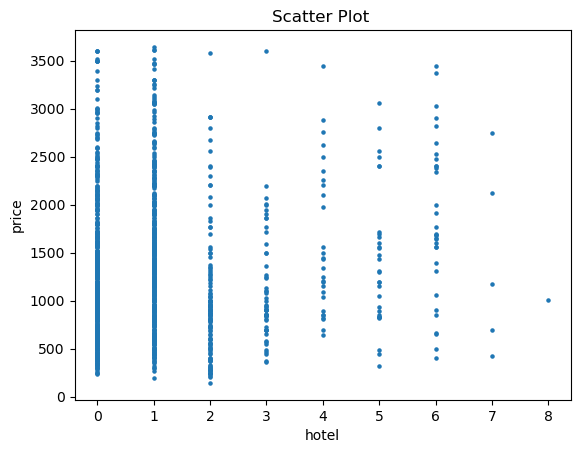

-3.8976966267812814 9.71119654332966e-05


In [161]:
plt.scatter(df_mex['hotel_n'], df_mex['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('hotel')
plt.ylabel('price')


plt.show()
g_0 = df_mex[df_mex['hotel_n'] >  3]['price']
g_1 = df_mex[df_mex['hotel_n'] <= 3]['price']
z, p = ztest(g_1, g_0)
print(z,p)

# rio


In [20]:
df_rio = pd.read_csv('rio4.csv')
df_rio['price'] = df_rio['price'].str.replace(',', '')
df_rio['price'] = df_rio['price'].str.replace('$', '').astype(float)
Q1 = df_rio['price'].quantile(0.25)
Q3 = df_rio['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_rio = df_rio[(df_rio['price'] >= lower_bound) & (df_rio['price'] <= upper_bound)]
print(df_rio.head(20))

         id neighbourhood_cleansed  latitude  longitude   price  subway_n  \
1    264816        Barra da Tijuca -23.00291  -43.39086   287.0         0   
2     96431        Barra da Tijuca -23.01124  -43.37081   581.0         0   
3    296910        Barra da Tijuca -23.00705  -43.32212   900.0         0   
4    313985        Barra da Tijuca -23.00715  -43.32929   497.0         0   
5    361568        Barra da Tijuca -23.01524  -43.30342   500.0         0   
7    575720        Barra da Tijuca -23.00445  -43.30953   343.0         3   
8    484296        Barra da Tijuca -23.00439  -43.37633   200.0         0   
9    501561        Barra da Tijuca -23.00722  -43.32096   600.0         0   
10   519542        Barra da Tijuca -23.01106  -43.32761   550.0         0   
12   858171        Barra da Tijuca -23.01017  -43.35548   367.0         0   
13   760259        Barra da Tijuca -23.01344  -43.39187   545.0         0   
14   808301        Barra da Tijuca -23.00866  -43.42651   500.0         0   

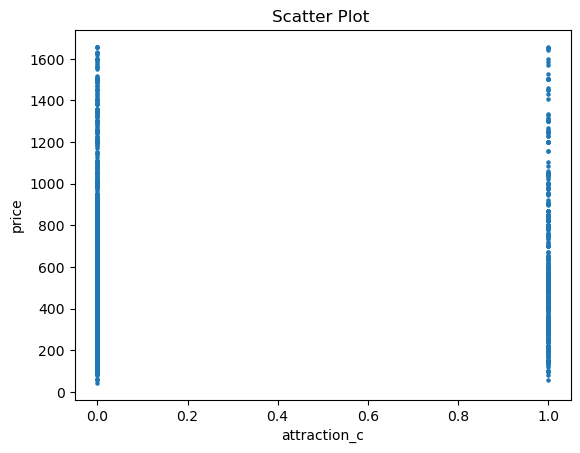

8.959850208984024 3.2511976534332096e-19


In [459]:
plt.scatter(df_rio['attraction_c'], df_rio['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('attraction_c')
plt.ylabel('price')


plt.show()
g_0 = df_rio[df_rio['attraction_c'] < 1 ]['price']
g_1 = df_rio[df_rio['attraction_c'] >= 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

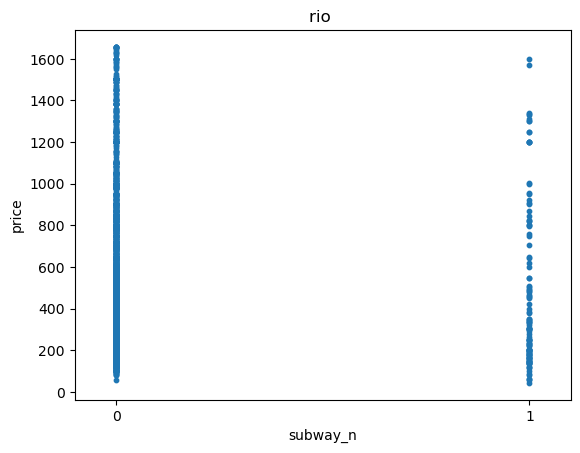

In [22]:
df_rio['subway_n'] = df_rio['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_rio['subway_n'], df_rio['price'],s = 10)

plt.title('rio ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()

In [463]:
g_0 = df_rio[df_rio['subway_n'] == 0]['price']
g_1 = df_rio[df_rio['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

-1.4300857051194662 0.1526924224315047


In [171]:
'''g_0 = df_rio[df_rio['subway_n'] == 0]['price']
g_1 = df_rio[df_rio['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

"g_0 = df_rio[df_rio['subway_n'] == 0]['price']\ng_1 = df_rio[df_rio['subway_n'] == 1]['price']\nz, p = ztest(g_1, g_0)\nprint(z,p)"

In [465]:
g_0.mean(),g_1.mean()

(519.3354596622889, 476.0655737704918)

In [175]:
'''df_rio = pd.read_csv('rio2.csv')
df_rio['price'] = df_rio['price'].str.replace(',', '')
df_rio['price'] = df_rio['price'].str.replace('$', '').astype(float)
print(df_rio.head(20))
df_rio['subway_n'] = df_rio['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_rio['subway_n'], df_rio['price'],s = 10)

plt.title('Scatter Plot ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)
plt.ylim(0, 2000)

plt.show()'''

"df_rio = pd.read_csv('rio2.csv')\ndf_rio['price'] = df_rio['price'].str.replace(',', '')\ndf_rio['price'] = df_rio['price'].str.replace('$', '').astype(float)\nprint(df_rio.head(20))\ndf_rio['subway_n'] = df_rio['subway_n'].apply(lambda x: 1 if x >= 1 else x)\nplt.scatter(df_rio['subway_n'], df_rio['price'],s = 10)\n\nplt.title('Scatter Plot ')\nplt.xlabel('subway_n')\nplt.ylabel('price')\nplt.xticks([0, 1])\nplt.xlim(-0.1, 1.1)\nplt.ylim(0, 2000)\n\nplt.show()"

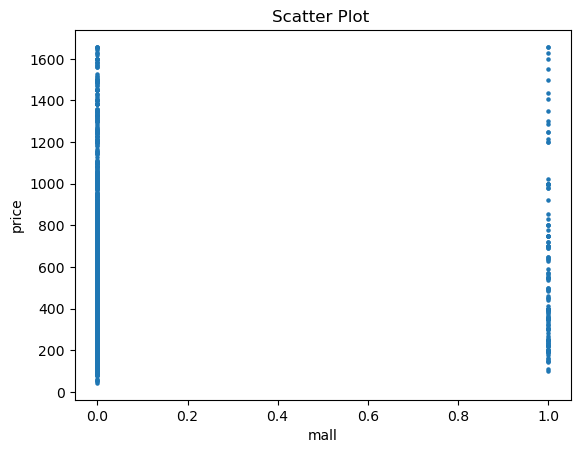

In [467]:
plt.scatter(df_rio['mall_n'], df_rio['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('mall')
plt.ylabel('price')


plt.show()

In [469]:
g_0 = df_rio[df_rio['mall_n'] < 1]['price']
g_1 = df_rio[df_rio['mall_n'] >=1 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)

2.0984003128448836 0.03586979768076725


In [181]:
g_1.mean(), g_0.mean()

(549.2816901408451, 505.63142218912884)

In [350]:
'''g_0 = df_rio[df_rio['mall_n'] < 1]['price']
g_1 = df_rio[df_rio['mall_n'] >=1 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

7.227528069284138 4.918645038977217e-13


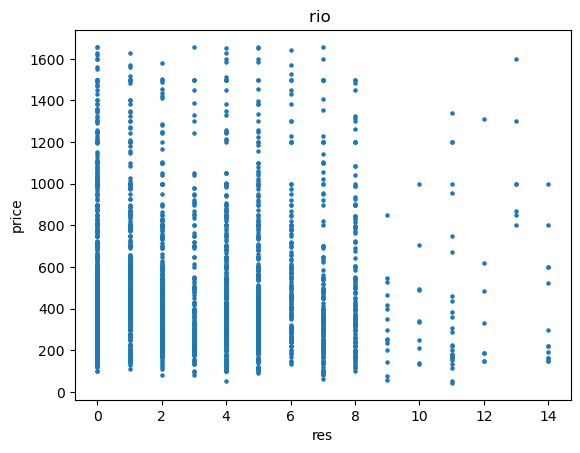

In [42]:
plt.scatter(df_rio['res_n'], df_rio['price'],s = 5)

plt.title('rio ')
plt.xlabel('res')
plt.ylabel('price')


plt.show()

In [473]:
g_0 = df_mex[df_mex['res_n'] < 2]['price']
g_1 = df_mex[df_mex['res_n'] >= 5 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)

7.321771992428113 2.4471770297065966e-13


In [187]:
g_1.mean(), g_0.mean()

(1453.222988505747, 970.4266666666666)

In [189]:
'''df_rio = pd.read_csv('rio2.csv')
df_rio['price'] = df_rio['price'].str.replace(',', '')
df_rio['price'] = df_rio['price'].str.replace('$', '').astype(float)
plt.scatter(df_rio['res_n'], df_rio['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('res')
plt.ylabel('price')
plt.ylim(0, 2000)

plt.show()'''

"df_rio = pd.read_csv('rio2.csv')\ndf_rio['price'] = df_rio['price'].str.replace(',', '')\ndf_rio['price'] = df_rio['price'].str.replace('$', '').astype(float)\nplt.scatter(df_rio['res_n'], df_rio['price'],s = 5)\n\nplt.title('Scatter Plot ')\nplt.xlabel('res')\nplt.ylabel('price')\nplt.ylim(0, 2000)\n\nplt.show()"

In [191]:
'''df_rio = pd.read_csv('rio.csv')
df_rio['price'] = df_rio['price'].str.replace(',', '')
df_rio['price'] = df_rio['price'].str.replace('$', '').astype(float)
print(df_rio.head(20))
g_0 = df_mex[df_mex['res_n'] < 10]['price']
g_1 = df_mex[df_mex['res_n'] >=20 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

"df_rio = pd.read_csv('rio.csv')\ndf_rio['price'] = df_rio['price'].str.replace(',', '')\ndf_rio['price'] = df_rio['price'].str.replace('$', '').astype(float)\nprint(df_rio.head(20))\ng_0 = df_mex[df_mex['res_n'] < 10]['price']\ng_1 = df_mex[df_mex['res_n'] >=20 ]['price']\nz, p = ztest(g_1, g_0)\nprint(z,p)"

In [193]:
'''df_rio = pd.read_csv('rio.csv')
df_rio['price'] = df_rio['price'].str.replace(',', '')
df_rio['price'] = df_rio['price'].str.replace('$', '').astype(float)
print(df_rio.head(20))
g_0 = df_rio[df_rio['res_n'] < 10]['price']
g_1 = df_rio[df_rio['res_n'] >=20 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

"df_rio = pd.read_csv('rio.csv')\ndf_rio['price'] = df_rio['price'].str.replace(',', '')\ndf_rio['price'] = df_rio['price'].str.replace('$', '').astype(float)\nprint(df_rio.head(20))\ng_0 = df_rio[df_rio['res_n'] < 10]['price']\ng_1 = df_rio[df_rio['res_n'] >=20 ]['price']\nz, p = ztest(g_1, g_0)\nprint(z,p)"

In [195]:
'''g_0 = df_rio[df_rio['res_n'] < 4]['price']
g_1 = df_rio[df_rio['res_n'] >=4 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

"g_0 = df_rio[df_rio['res_n'] < 4]['price']\ng_1 = df_rio[df_rio['res_n'] >=4 ]['price']\nz, p = ztest(g_1, g_0)\nprint(z,p)"

In [377]:
g_1.mean(), g_0.mean()

(2202.1805555555557, 1362.5747663551401)

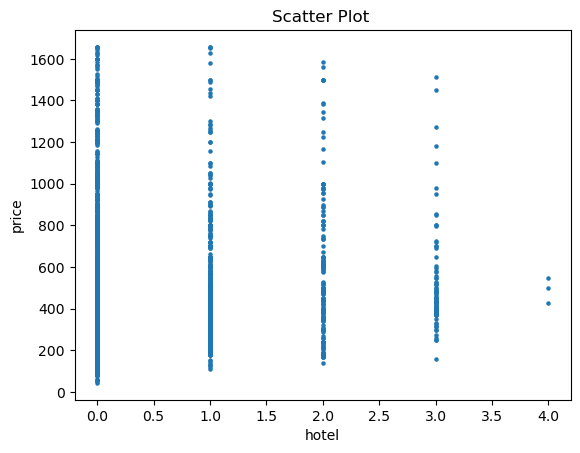

-1.4012629588534415 0.1611354534693893


In [475]:
plt.scatter(df_rio['hotel_n'], df_rio['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('hotel')
plt.ylabel('price')


plt.show()
g_0 = df_rio[df_rio['hotel_n'] >=  2]['price']
g_1 = df_rio[df_rio['hotel_n'] < 2]['price']
z, p = ztest(g_1, g_0)
print(z,p)

# tk

In [ ]:
df_par = pd.read_csv('tk21.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(2))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)

        id neighbourhood_cleansed  latitude  longitude    price  subway_n  \
0  6719865               Taito Ku  35.72024  139.76607  24130.0         4   
1  7358397               Taito Ku  35.70511  139.79276  36000.0        10   

   res_n  bus_n  
0     60     16  
1     43     25  


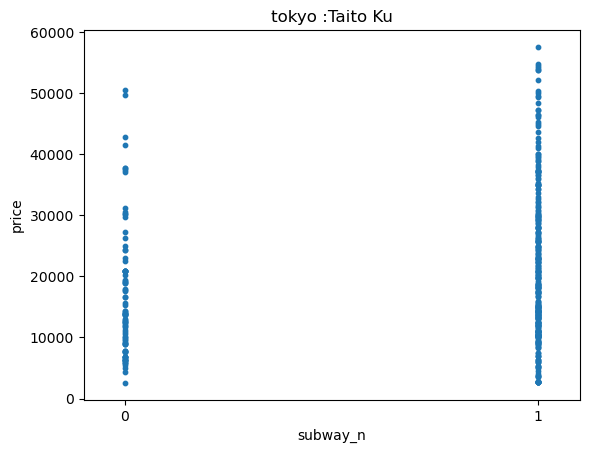

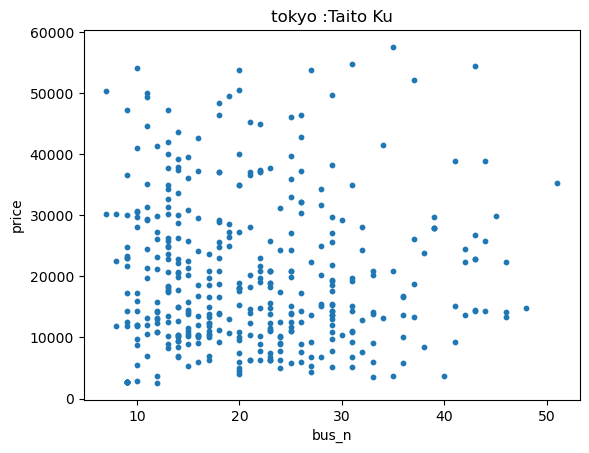

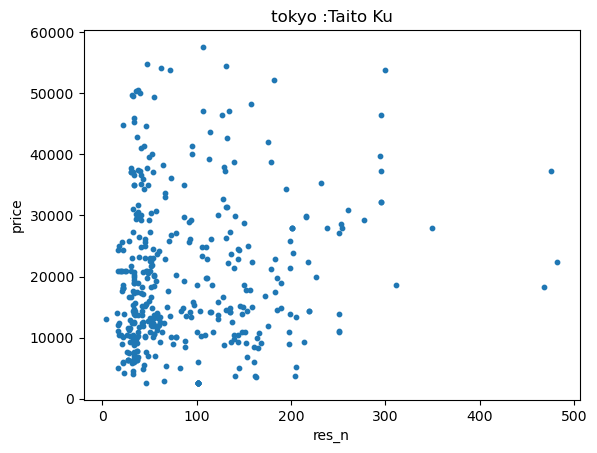

In [50]:
df_par = pd.read_csv('tk21.csv')
df_par['price'] = df_par['price'].str.replace(',', '')
df_par['price'] = df_par['price'].str.replace('$', '').astype(float)
Q1 = df_par['price'].quantile(0.25)
Q3 = df_par['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_par = df_par[(df_par['price'] >= lower_bound) & (df_par['price'] <= upper_bound)]
print(df_par.head(2))
df_par['subway_n'] = df_par['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_par['subway_n'], df_par['price'],s = 10)

plt.title('tokyo :'+df_par['neighbourhood_cleansed'][0])
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
plt.scatter(df_par['bus_n'], df_par['price'],s = 10)

plt.title('tokyo :'+df_par['neighbourhood_cleansed'][0])
plt.xlabel('bus_n')
plt.ylabel('price')



plt.show()
plt.scatter(df_par['res_n'], df_par['price'],s = 10)

plt.title('tokyo :'+df_par['neighbourhood_cleansed'][0])
plt.xlabel('res_n')
plt.ylabel('price')



plt.show()

In [41]:
df_tk = pd.read_csv('tk24.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]

df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
df_tk.to_csv('tk34.csv')

In [45]:
df_tk = pd.read_csv('tk24.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(2))
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
print(df_tk['subway_n'].mean(),df_tk['bus_n'].mean(),df_tk['res_n'].mean())

        id neighbourhood_cleansed  latitude  longitude    price  subway_n  \
0   905944             Shibuya Ku  35.67878  139.67847  25738.0         2   
1  1249571             Shibuya Ku  35.65111  139.72165  62047.0         4   

   res_n  bus_n  
0     30     15  
1     57     16  
0.6433189655172413 19.408405172413794 68.04956896551724


          id neighbourhood_cleansed  latitude  longitude    price  subway_n  \
0    6719865               Taito Ku  35.72024  139.76607  24130.0         4   
1    7358397               Taito Ku  35.70511  139.79276  36000.0        10   
2    9738892               Taito Ku  35.70146  139.78448  29829.0         4   
3   10061086               Taito Ku  35.72065  139.76933  29486.0         2   
4   12009565               Taito Ku  35.71442  139.78553  23000.0         5   
5   12472116               Taito Ku  35.70603  139.79437  13757.0        12   
6   13131654               Taito Ku  35.70643  139.79617  15429.0        11   
7   13442315               Taito Ku  35.70622  139.79435  15171.0        14   
8   13569439               Taito Ku  35.71475  139.78452  23000.0         5   
9   14778588               Taito Ku  35.70819  139.79628  14786.0        18   
10  15820690               Taito Ku  35.70239  139.77787  14342.0         5   
11  15834112               Taito Ku  35.71516  139.7

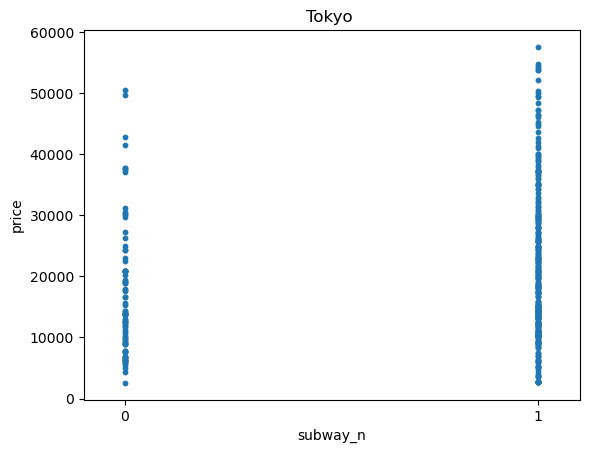

3.152304160210816 0.0016198744167382777
16619.197802197803 21104.575562700964
21.176616915422887
res count    402.000000
mean      89.858209
std       75.107718
min        4.000000
25%       36.000000
50%       55.000000
75%      131.000000
max      482.000000
Name: res_n, dtype: float64
3.2527503853251125 0.0011429385066285688
14817.704545454546 20978.70036101083
89.85820895522389 20089.228855721394 0.004472954616654305


In [386]:
df_tk = pd.read_csv('tk21.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(20))
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_tk['subway_n'], df_tk['price'],s = 10)

plt.title('Tokyo ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
print(g_0.mean(), g_1.mean())
print(df_tk['bus_n'].mean())
'''print('aa')
df_tk['subway_n'] = df_tk['subway_n'] + df_tk['bus_n']
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print('after merging')
print(z,p)
print(g_0.mean(),g_1.mean())'''


print('res',df_tk['res_n'].describe())
r_0 = df_tk[df_tk['res_n'] < 30]['price']
r_1 = df_tk[df_tk['res_n'] >=40 ]['price']
z, p = ztest(r_1, r_0)
print(z,p)
print(r_0.mean(), r_1.mean())
print(df_tk['res_n'].mean(),df_tk['price'].mean(),df_tk['res_n'].mean()/df_tk['price'].mean())

          id neighbourhood_cleansed   latitude   longitude    price  subway_n  \
0     197677              Sumida Ku  35.717070  139.826080  12000.0         0   
1    6365363              Sumida Ku  35.718650  139.810690  10286.0         0   
2    6837981              Sumida Ku  35.718480  139.811090  10286.0         0   
3    9158327              Sumida Ku  35.706720  139.813350  17571.0         6   
4   11259582              Sumida Ku  35.708060  139.816900  17143.0         6   
5   12793156              Sumida Ku  35.710450  139.818340   5271.0         6   
6   14284467              Sumida Ku  35.715280  139.810280  13120.0         2   
7   14558348              Sumida Ku  35.707460  139.817110  24714.0         5   
8   15751842              Sumida Ku  35.722830  139.825060  29143.0         0   
9   16115606              Sumida Ku  35.715589  139.824653  12143.0         0   
10  17258342              Sumida Ku  35.698810  139.813490  14000.0         5   
11  19040901              Su

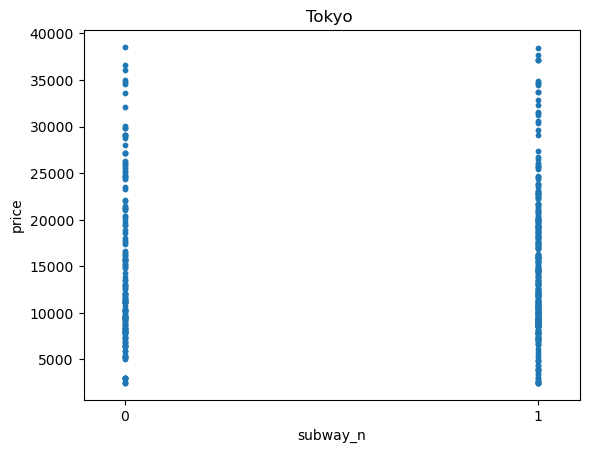

-0.3037171727033981 0.7613433737379076
15031.907975460123 14797.761437908497
aa
20.699360341151387
after merging
0.25983332687538424 0.7949923424861418
13421.5 14885.381156316917
res count    469.000000
mean      24.181237
std       23.262603
min        0.000000
25%        7.000000
50%       20.000000
75%       30.000000
max      125.000000
Name: res_n, dtype: float64
-0.712995263531709 0.4758486880599504
15755.166666666666 15047.358333333334
24.181236673773988 14879.138592750533 0.0016251771917465475


In [388]:
df_tk = pd.read_csv('tk20.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(20))
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_tk['subway_n'], df_tk['price'],s = 10)

plt.title('Tokyo ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
print(g_0.mean(), g_1.mean())
print('aa')
print(df_tk['bus_n'].mean())
df_tk['subway_n'] = df_tk['subway_n'] + df_tk['bus_n']
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print('after merging')
print(z,p)
print(g_0.mean(),g_1.mean())

print('res',df_tk['res_n'].describe())
r_0 = df_tk[df_tk['res_n'] < 5]['price']
r_1 = df_tk[df_tk['res_n'] >=20 ]['price']
z, p = ztest(r_1, r_0)
print(z,p)
print(r_0.mean(), r_1.mean())
print(df_tk['res_n'].mean(),df_tk['price'].mean(),df_tk['res_n'].mean()/df_tk['price'].mean())

          id neighbourhood_cleansed  latitude  longitude    price  subway_n  \
0    7876373                Chuo Ku  35.68842  139.77816   6084.0        25   
1    7876385                Chuo Ku  35.68903  139.77667   6560.0        24   
2    7876639                Chuo Ku  35.68699  139.77643   5597.0        27   
3   13497745                Chuo Ku  35.68694  139.77637   6999.0        27   
4   13693481                Chuo Ku  35.68679  139.77650   7222.0        27   
5   13932441                Chuo Ku  35.68880  139.77632   9225.0        25   
6   14187693                Chuo Ku  35.68889  139.77632   9882.0        25   
7   14836177                Chuo Ku  35.68684  139.77684  10660.0        27   
8   15578042                Chuo Ku  35.68744  139.77637   7527.0        27   
9   15685047                Chuo Ku  35.66371  139.77448   7429.0         2   
10  15739640                Chuo Ku  35.66309  139.77384   7429.0         1   
11  15747123                Chuo Ku  35.66424  139.7

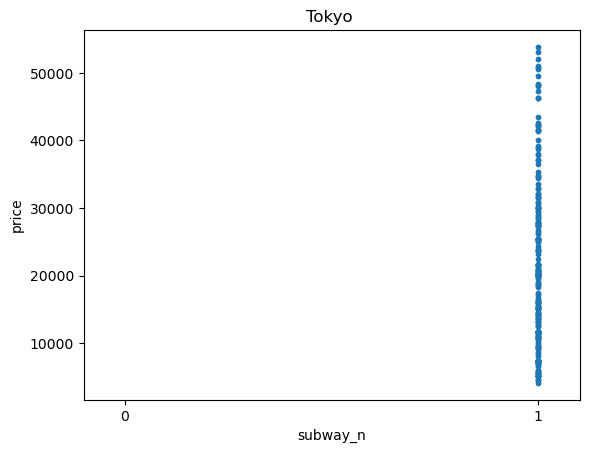

res count    225.000000
mean      64.404444
std       45.024904
min        5.000000
25%       37.000000
50%       57.000000
75%       81.000000
max      231.000000
Name: res_n, dtype: float64
3.4215684721779054 0.0006226104541930057
22771.146341463416 15712.357142857143
64.40444444444445 20651.453333333335 0.003118639807324833


In [390]:
df_tk = pd.read_csv('tk22.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(20))
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_tk['subway_n'], df_tk['price'],s = 10)

plt.title('Tokyo ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
'''g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
print(g_1.mean(), g_0.mean())'''

print('res',df_tk['res_n'].describe())
r_0 = df_tk[df_tk['res_n'] < 30]['price']
r_1 = df_tk[df_tk['res_n'] >=40 ]['price']
z, p = ztest(r_1, r_0)
print(z,p)
print(r_1.mean(), r_0.mean())
print(df_tk['res_n'].mean(),df_tk['price'].mean(),df_tk['res_n'].mean()/df_tk['price'].mean())

          id neighbourhood_cleansed   latitude   longitude    price  subway_n  \
0    6803014              Minato Ku  35.636120  139.725750  30000.0         2   
1    7123125              Minato Ku  35.656810  139.752710  30000.0        20   
2    7227038              Minato Ku  35.656120  139.734370  25643.0         9   
3    8264671              Minato Ku  35.667300  139.719160   8000.0         5   
4    8372308              Minato Ku  35.667755  139.752808  27652.0        25   
5   10999290              Minato Ku  35.670730  139.726090  16208.0         8   
6   11707373              Minato Ku  35.665220  139.746540  37620.0        13   
7   11851041              Minato Ku  35.638600  139.737030  14478.0         5   
8   12114845              Minato Ku  35.669421  139.752514  19943.0        33   
9   12117110              Minato Ku  35.668110  139.751980  43086.0        27   
10  12117339              Minato Ku  35.667830  139.752060  43086.0        25   
11  12117412              Mi

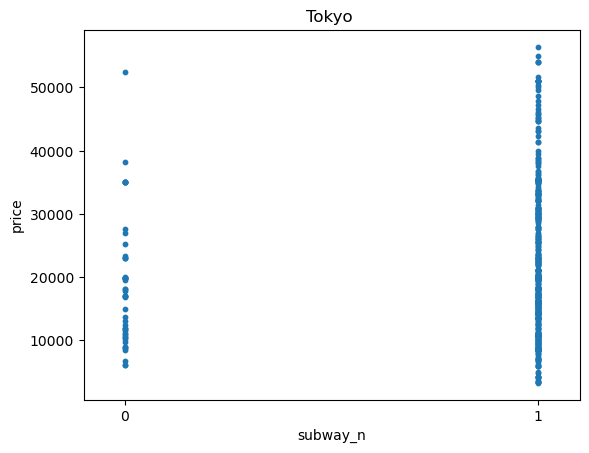

1.7442154565844605 0.08112152711314433
21687.606194690266 18700.408163265307
res count    501.000000
mean      85.956088
std       78.325565
min        1.000000
25%       26.000000
50%       57.000000
75%      129.000000
max      272.000000
Name: res_n, dtype: float64
4.579396636331767 4.663191650179898e-06
23103.271293375394 18125.175324675325
85.9560878243513 21395.445109780438 0.0040174947229800065


In [392]:
df_tk = pd.read_csv('tk23.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(20))
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_tk['subway_n'], df_tk['price'],s = 10)

plt.title('Tokyo ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
print(g_1.mean(), g_0.mean())

print('res',df_tk['res_n'].describe())
r_0 = df_tk[df_tk['res_n'] < 30]['price']
r_1 = df_tk[df_tk['res_n'] >=40 ]['price']
z, p = ztest(r_1, r_0)
print(z,p)
print(r_1.mean(), r_0.mean())
print(df_tk['res_n'].mean(),df_tk['price'].mean(),df_tk['res_n'].mean()/df_tk['price'].mean())


         id neighbourhood_cleansed   latitude  longitude    price  subway_n  \
0    905944             Shibuya Ku  35.678780  139.67847  25738.0         2   
1   1249571             Shibuya Ku  35.651110  139.72165  62047.0         4   
2   2238472             Shibuya Ku  35.671910  139.68367  39000.0         5   
3   3085134             Shibuya Ku  35.651740  139.72175  44429.0         4   
4   3689244             Shibuya Ku  35.672050  139.67877  34000.0         5   
5   3838856             Shibuya Ku  35.682450  139.69009  56250.0         5   
6   3886601             Shibuya Ku  35.649660  139.72181  50143.0         4   
7   3956263             Shibuya Ku  35.678130  139.67913  17695.0         2   
8   4825779             Shibuya Ku  35.677440  139.68058  18000.0         2   
9   4925503             Shibuya Ku  35.679230  139.67571  12000.0         2   
10  4926317             Shibuya Ku  35.680680  139.67530  11143.0         2   
11  4926426             Shibuya Ku  35.679330  139.6

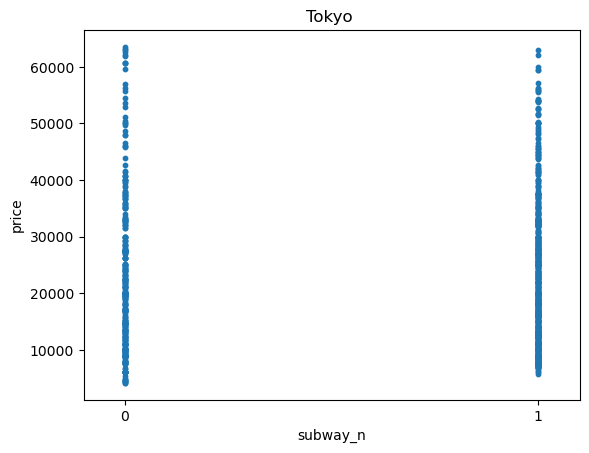

0.18424076544295076 0.8538245806283876
22718.460636515912 22553.274924471298
aa
19.408405172413794
res count    928.000000
mean      68.049569
std       84.911997
min        1.000000
25%       17.000000
50%       30.000000
75%       66.000000
max      302.000000
Name: res_n, dtype: float64
7.448644715802688 9.430394964729569e-14
27048.07715133531 20106.229545454546
68.04956896551724 22659.54202586207 0.0030031308173770707


In [394]:
df_tk = pd.read_csv('tk24.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(20))
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_tk['subway_n'], df_tk['price'],s = 10)

plt.title('Tokyo ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
print(g_1.mean(), g_0.mean())
print('aa')
print(df_tk['bus_n'].mean())
'''df_tk['subway_n'] = df_tk['subway_n'] + df_tk['bus_n']
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print('after merging')
print(z,p)
print(g_0.mean(),g_1.mean())'''

print('res',df_tk['res_n'].describe())
r_0 = df_tk[df_tk['res_n'] < 30]['price']
r_1 = df_tk[df_tk['res_n'] >=40 ]['price']
z, p = ztest(r_1, r_0)
print(z,p)
print(r_1.mean(), r_0.mean())
print(df_tk['res_n'].mean(),df_tk['price'].mean(),df_tk['res_n'].mean()/df_tk['price'].mean())

          id neighbourhood_cleansed  latitude  longitude    price  subway_n  \
0    6719865               Taito Ku  35.72024  139.76607  24130.0         4   
1    7358397               Taito Ku  35.70511  139.79276  36000.0        10   
2    9738892               Taito Ku  35.70146  139.78448  29829.0         4   
3   10061086               Taito Ku  35.72065  139.76933  29486.0         2   
4   12009565               Taito Ku  35.71442  139.78553  23000.0         5   
5   12472116               Taito Ku  35.70603  139.79437  13757.0        12   
6   13131654               Taito Ku  35.70643  139.79617  15429.0        11   
7   13442315               Taito Ku  35.70622  139.79435  15171.0        14   
8   13569439               Taito Ku  35.71475  139.78452  23000.0         5   
9   14778588               Taito Ku  35.70819  139.79628  14786.0        18   
10  15820690               Taito Ku  35.70239  139.77787  14342.0         5   
11  15834112               Taito Ku  35.71516  139.7

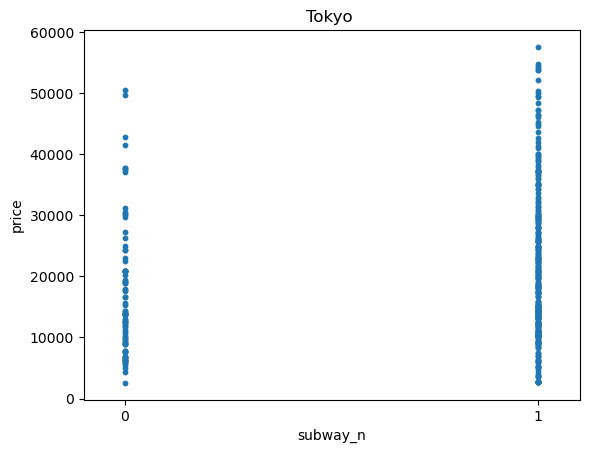

3.152304160210816 0.0016198744167382777
21104.575562700964 16619.197802197803
res count    402.000000
mean      89.858209
std       75.107718
min        4.000000
25%       36.000000
50%       55.000000
75%      131.000000
max      482.000000
Name: res_n, dtype: float64
2.5011114108365513 0.012380422452112936
20978.70036101083 16460.64


In [334]:
df_tk = pd.read_csv('tk21.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(20))
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_tk['subway_n'], df_tk['price'],s = 10)

plt.title('Tokyo ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
print(g_1.mean(), g_0.mean())

print('res',df_tk['res_n'].describe())
r_0 = df_tk[df_tk['res_n'] <=30]['price']
r_1 = df_tk[df_tk['res_n'] >=40 ]['price']
z, p = ztest(r_1, r_0)
print(z,p)
print(r_1.mean(), r_0.mean())

In [75]:
df_tk = pd.read_csv('ty21.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(20))

          id neighbourhood_cleansed  latitude  longitude    price  subway_n  \
0    6719865               Taito Ku  35.72024  139.76607  24130.0         4   
1    7358397               Taito Ku  35.70511  139.79276  36000.0        10   
2    9738892               Taito Ku  35.70146  139.78448  29829.0         4   
3   10061086               Taito Ku  35.72065  139.76933  29486.0         2   
4   12009565               Taito Ku  35.71442  139.78553  23000.0         5   
5   12472116               Taito Ku  35.70603  139.79437  13757.0        12   
6   13131654               Taito Ku  35.70643  139.79617  15429.0        11   
7   13442315               Taito Ku  35.70622  139.79435  15171.0        14   
8   13569439               Taito Ku  35.71475  139.78452  23000.0         5   
9   14778588               Taito Ku  35.70819  139.79628  14786.0        18   
10  15820690               Taito Ku  35.70239  139.77787  14342.0         5   
11  15834112               Taito Ku  35.71516  139.7

In [71]:
df_tk = pd.read_csv('ty20.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(20))

          id neighbourhood_cleansed   latitude   longitude    price  subway_n  \
0     197677              Sumida Ku  35.717070  139.826080  12000.0         0   
1    6365363              Sumida Ku  35.718650  139.810690  10286.0         0   
2    6837981              Sumida Ku  35.718480  139.811090  10286.0         0   
3    9158327              Sumida Ku  35.706720  139.813350  17571.0         6   
4   11259582              Sumida Ku  35.708060  139.816900  17143.0         6   
5   12793156              Sumida Ku  35.710450  139.818340   5271.0         6   
6   14284467              Sumida Ku  35.715280  139.810280  13120.0         2   
7   14558348              Sumida Ku  35.707460  139.817110  24714.0         5   
8   15751842              Sumida Ku  35.722830  139.825060  29143.0         0   
9   16115606              Sumida Ku  35.715589  139.824653  12143.0         0   
10  17258342              Sumida Ku  35.698810  139.813490  14000.0         5   
11  19040901              Su

          id neighbourhood_cleansed  latitude  longitude    price  subway_n  \
0    7876373                Chuo Ku  35.68842  139.77816   6084.0        25   
1    7876385                Chuo Ku  35.68903  139.77667   6560.0        24   
2    7876639                Chuo Ku  35.68699  139.77643   5597.0        27   
3   13497745                Chuo Ku  35.68694  139.77637   6999.0        27   
4   13693481                Chuo Ku  35.68679  139.77650   7222.0        27   
5   13932441                Chuo Ku  35.68880  139.77632   9225.0        25   
6   14187693                Chuo Ku  35.68889  139.77632   9882.0        25   
7   14836177                Chuo Ku  35.68684  139.77684  10660.0        27   
8   15578042                Chuo Ku  35.68744  139.77637   7527.0        27   
9   15685047                Chuo Ku  35.66371  139.77448   7429.0         2   
10  15739640                Chuo Ku  35.66309  139.77384   7429.0         1   
11  15747123                Chuo Ku  35.66424  139.7

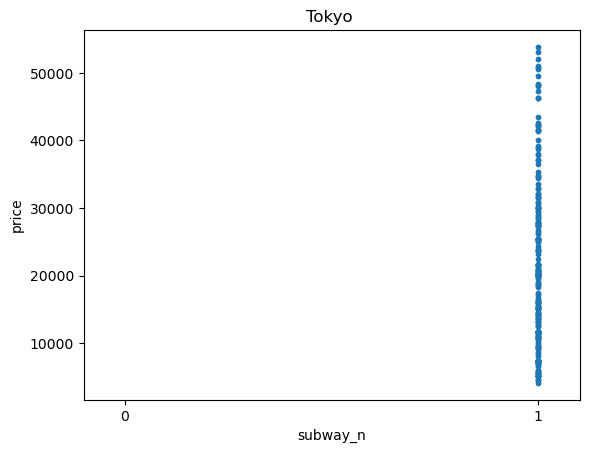

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/stats/weightstats.py:1550: RuntimeWarning: Mean of empty slice.
  x2_mean = x2.mean(0)
/Applications/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/stats/weightstats.py:1551: RuntimeWarning: Degrees of freedom <= 0 for slice
  x2_var = x2.var(0)
/Applications/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Applications/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: float division by zero

In [73]:
df_tk = pd.read_csv('tk10.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(50))
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_tk['subway_n'], df_tk['price'],s = 10)

plt.title('Tokyo ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_1.mean(), g_0.mean()


        id neighbourhood_cleansed  latitude  longitude    price  subway_n  \
0   197677              Sumida Ku  35.71707  139.82608  12000.0         0   
1  6365363              Sumida Ku  35.71865  139.81069  10286.0         0   
2  6768640              Sumida Ku  35.71818  139.81237  10286.0         0   
3  6837981              Sumida Ku  35.71848  139.81109  10286.0         0   
4  6838363              Sumida Ku  35.71893  139.81294  10286.0         0   

   attraction_c  res_n  
0             1      1  
1             3      1  
2             3      2  
3             3      2  
4             3      3  


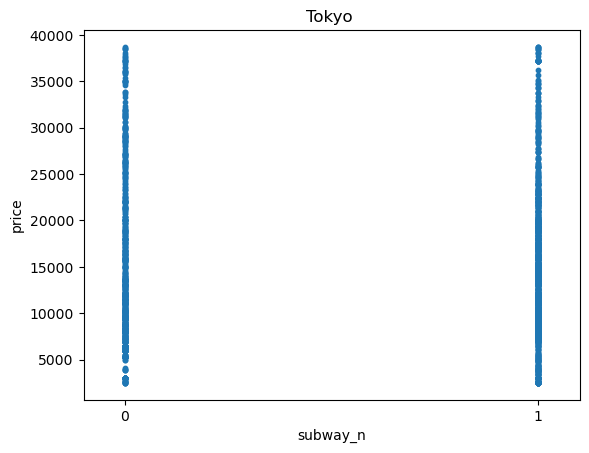

-2.1403853104554926 0.0323236406735759


(14389.47744680851, 15244.680685358255)

In [44]:
df_tk = pd.read_csv('tk11.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(5))
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_tk['subway_n'], df_tk['price'],s = 10)

plt.title('Tokyo ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_1.mean(), g_0.mean()


        id neighbourhood_cleansed  latitude  longitude    price  subway_n  \
0  2883497               Taito Ku  35.72208  139.78049  23371.0         5   
1  3364169               Taito Ku  35.72230  139.80049  13000.0         0   
2  4050925               Taito Ku  35.71431  139.79885  40000.0         8   
3  4817291               Taito Ku  35.72804  139.79048  17000.0         5   
4  4925745               Taito Ku  35.72951  139.79137  28700.0         5   

   attraction_c  res_n  
0             1     54  
1             1     29  
2             9    133  
3             2     36  
4             1     33  


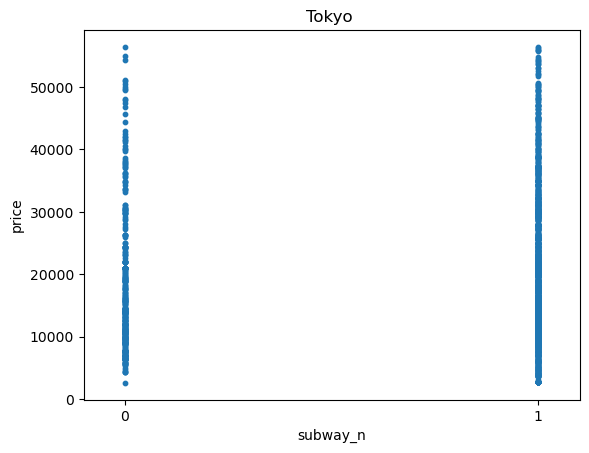

3.4248408574676317 0.0006151596439384585


(20346.97770700637, 17973.840220385675)

In [46]:
df_tk = pd.read_csv('tk12.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(5))
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_tk['subway_n'], df_tk['price'],s = 10)

plt.title('Tokyo ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_1.mean(), g_0.mean()

        id neighbourhood_cleansed   latitude   longitude    price  subway_n  \
0  6803014              Minato Ku  35.636120  139.725750  30000.0         2   
1  7123125              Minato Ku  35.656810  139.752710  30000.0        20   
2  7227038              Minato Ku  35.656120  139.734370  25643.0         9   
3  8264671              Minato Ku  35.667300  139.719160   8000.0         5   
4  8372308              Minato Ku  35.667755  139.752808  27652.0        25   

   attraction_c  res_n  
0             1      7  
1             2     52  
2             2     64  
3             3     93  
4             5    171  


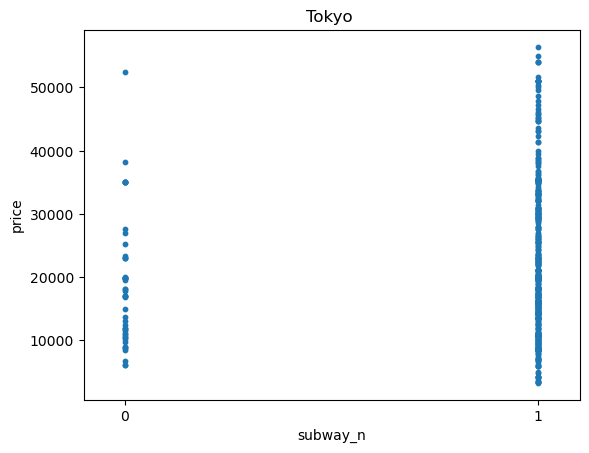

1.7442154565844605 0.08112152711314433


(21687.606194690266, 18700.408163265307)

In [50]:
df_tk = pd.read_csv('tk13.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(5))
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_tk['subway_n'], df_tk['price'],s = 10)

plt.title('Tokyo ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_1.mean(), g_0.mean()

        id neighbourhood_cleansed  latitude  longitude    price  subway_n  \
0   905944             Shibuya Ku  35.67878  139.67847  25738.0         2   
1  1249571             Shibuya Ku  35.65111  139.72165  62047.0         4   
2  2238472             Shibuya Ku  35.67191  139.68367  39000.0         5   
3  3085134             Shibuya Ku  35.65174  139.72175  44429.0         4   
4  3689244             Shibuya Ku  35.67205  139.67877  34000.0         5   

   attraction_c  res_n  
0             1     30  
1             0     57  
2             0     32  
3             0     58  
4             0     25  


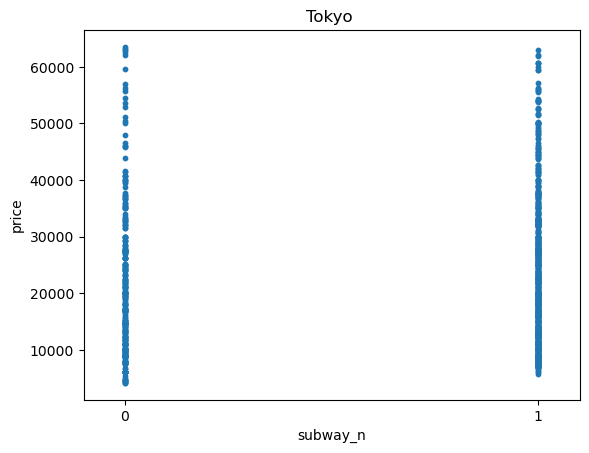

2.229709419424887 0.025766740145618177


(23305.06279434851, 21246.494845360823)

In [52]:
df_tk = pd.read_csv('tk14.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
Q1 = df_tk['price'].quantile(0.25)
Q3 = df_tk['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_tk = df_tk[(df_tk['price'] >= lower_bound) & (df_tk['price'] <= upper_bound)]
print(df_tk.head(5))
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_tk['subway_n'], df_tk['price'],s = 10)

plt.title('Tokyo ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_1.mean(), g_0.mean()

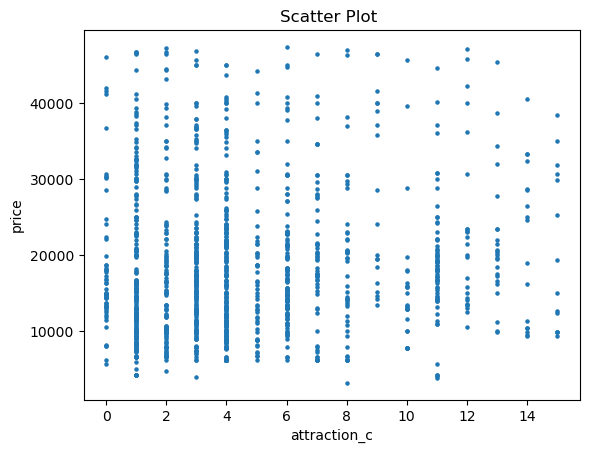

2.9144447070362998 0.0035632192324090294


In [288]:
plt.scatter(df_tk['attraction_c'], df_tk['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('attraction_c')
plt.ylabel('price')


plt.show()
g_0 = df_tk[df_tk['attraction_c'] < 2 ]['price']
g_1 = df_tk[df_tk['attraction_c'] > 4]['price']
z, p = ztest(g_1, g_0)
print(z,p)
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_tk['subway_n'], df_tk['price'],s = 10)

plt.title('Tokyo ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)
g_1.mean(), g_0.mean()

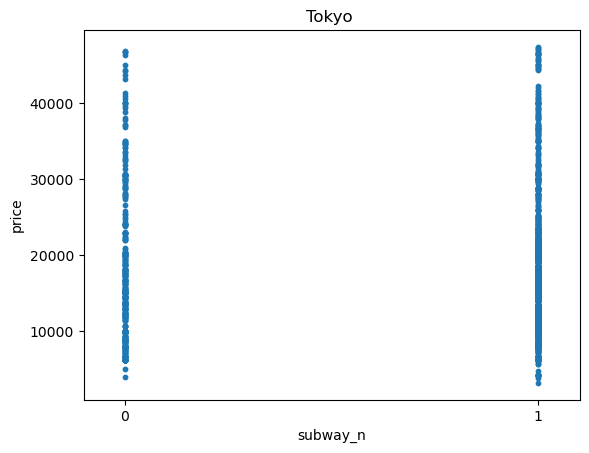

1.8917956960046325 0.05851820698420837


In [26]:
df_tk['subway_n'] = df_tk['subway_n'].apply(lambda x: 1 if x >= 1 else x)
plt.scatter(df_tk['subway_n'], df_tk['price'],s = 10)

plt.title('Tokyo ')
plt.xlabel('subway_n')
plt.ylabel('price')
plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)


plt.show()
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

In [211]:
g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)

1.8917956960046325 0.05851820698420837


In [214]:
g_1.mean(), g_0.mean()

(18387.101041666665, 17268.065217391304)

In [205]:
'''df_tk = pd.read_csv('tk2.csv')
df_tk['price'] = df_tk['price'].str.replace(',', '')
df_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)
print(df_tk.head(20))'''



"df_tk = pd.read_csv('tk2.csv')\ndf_tk['price'] = df_tk['price'].str.replace(',', '')\ndf_tk['price'] = df_tk['price'].str.replace('$', '').astype(float)\nprint(df_tk.head(20))"

In [216]:
'''g_0 = df_tk[df_tk['subway_n'] == 0]['price']
g_1 = df_tk[df_tk['subway_n'] == 1]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

"g_0 = df_tk[df_tk['subway_n'] == 0]['price']\ng_1 = df_tk[df_tk['subway_n'] == 1]['price']\nz, p = ztest(g_1, g_0)\nprint(z,p)"

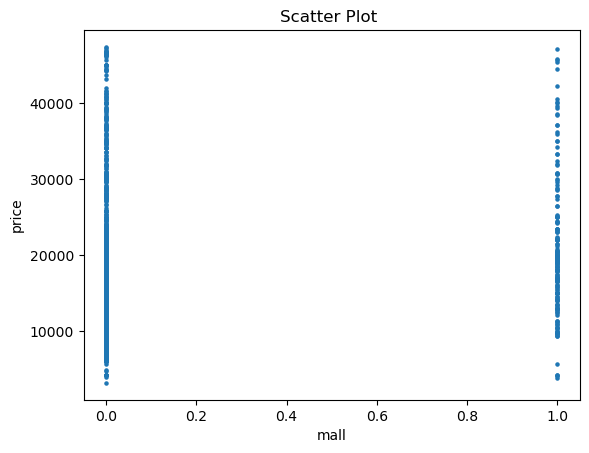

In [218]:
plt.scatter(df_tk['mall_n'], df_tk['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('mall')
plt.ylabel('price')


plt.show()

In [220]:
'''plt.scatter(df_tk['mall_n'], df_tk['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('mall')
plt.ylabel('price')
plt.ylim(0, 45000)

plt.show()'''

"plt.scatter(df_tk['mall_n'], df_tk['price'],s = 5)\n\nplt.title('Scatter Plot ')\nplt.xlabel('mall')\nplt.ylabel('price')\nplt.ylim(0, 45000)\n\nplt.show()"

In [222]:
g_0 = df_tk[df_tk['mall_n'] < 1]['price']
g_1 = df_tk[df_tk['mall_n'] >=1 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)

4.205927798420603 2.6001324046605887e-05


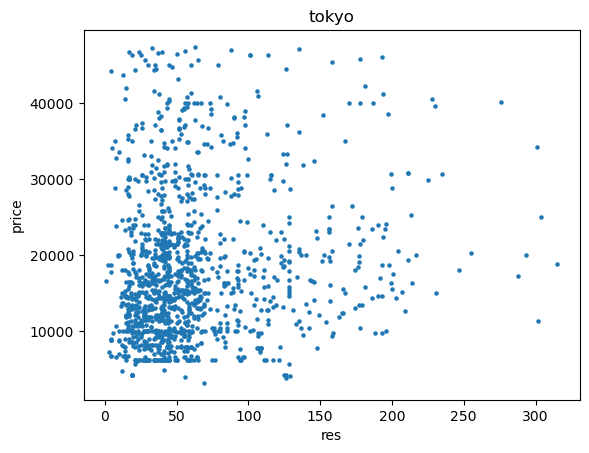

In [50]:
plt.scatter(df_tk['res_n'], df_tk['price'],s = 5)

plt.title('tokyo')
plt.xlabel('res')
plt.ylabel('price')


plt.show()

In [52]:
g_0 = df_tk[df_tk['res_n'] < 5]['price']
g_1 = df_tk[df_tk['res_n'] >=40 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)

1.6743751981978277 0.09405688400555613


In [242]:
'''g_0 = df_tk[df_tk['res_n'] < 5]['price']
g_1 = df_tk[df_tk['res_n'] >=20 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

"g_0 = df_tk[df_tk['res_n'] < 5]['price']\ng_1 = df_tk[df_tk['res_n'] >=20 ]['price']\nz, p = ztest(g_1, g_0)\nprint(z,p)"

In [244]:
'''_0 = df_tk[df_tk['res_n'] < 5]['price']
g_1 = df_tk[df_tk['res_n'] >=20 ]['price']
z, p = ztest(g_1, g_0)
print(z,p)'''

"_0 = df_tk[df_tk['res_n'] < 5]['price']\ng_1 = df_tk[df_tk['res_n'] >=20 ]['price']\nz, p = ztest(g_1, g_0)\nprint(z,p)"

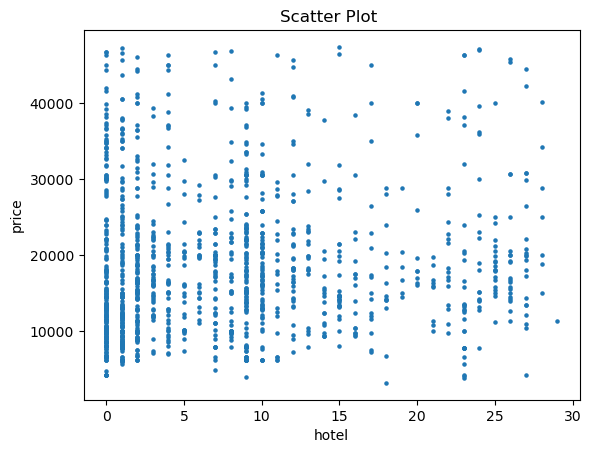

-2.7957868167164057 0.0051773539281593384


In [248]:
plt.scatter(df_tk['hotel_n'], df_tk['price'],s = 5)

plt.title('Scatter Plot ')
plt.xlabel('hotel')
plt.ylabel('price')


plt.show()
g_0 = df_hk[df_hk['hotel_n'] > 3]['price']
g_1 = df_hk[df_hk['hotel_n'] <= 3]['price']
z, p = ztest(g_1, g_0)
print(z,p)